# Predict the class of bike riders. 

<center>
    <img src = images/nycbike.png width = 80%/>
</center>

In this dataset, we will explore the new york city bike rider's trips. The information about the rider's trip is located <a href="https://ride.citibikenyc.com/system-data">here</a>. For the capstone project, we will be taking information from January 2022 to December 2022. 

Citi Bike is a bike-sharing service in New York City that allows users to rent and ride bikes from a network of self-service docking stations located throughout the city. To use Citi Bike, users must first sign up for a membership, which can be purchased online or at a Citi Bike kiosk. Once they have a membership, users can check out a bike from any Citi Bike docking station using their membership card or the Citi Bike app on their smartphone. After they have finished their ride, users can return the bike to any Citi Bike docking station. Citi Bike offers a variety of membership options, including daily, weekly, and annual memberships, as well as options for tourists and students. Citi Bike also offers electric bikes, which can be rented in the same way as standard bikes.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>

For this capstone project, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.

# Business Understanding

From a business perspective, we are tasked with classifying the memberships.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

## 1.1) Business Question

Given a dataset containing information bike riders trip attributes, predict the class of biker riders. 

## 1.2) Understanding of Business

Citibank nyc publishes the bike riders trip data every month. The data contains information which will help to answer the following questions 
###### 1) Where do Citi Bikers ride? 
###### 2) When do they ride? 
###### 3) How far do they go? 
###### 4) Which stations are most popular? 
###### 5) What days of the week are most rides taken on?

# Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In order to understand the data, some required libraries are imported to run few basic stats about the data. Navigating through the dataset using shape to determine the number of rows and columns and using the describe and info function to determine the mean,std and count along with the type of columns will help in next steps. 

## 2.1) Data Collection - Imports

In [1]:
#pandas for data manipulation
import pandas as pd
#numpy for numerical computations
import numpy as np
#plotly.express and plotly.graph_objects for creating interactive plots and charts
import plotly.express as px
import plotly.graph_objects as go
from collections import defaultdict
import plotly.graph_objects as go
#matplotlib and seaborn for creating static plots and charts
import matplotlib.pyplot as plt
#sklearn for machine learning tasks such as preprocessing, model selection, and evaluation
from sklearn import svm
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_score
import seaborn as sns
import plotly.subplots as sp
#calendar for handling month names
from calendar import month_abbr
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.impute import KNNImputer
#imblearn for oversampling techniques
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
# preprocessing
from sklearn.preprocessing import MinMaxScaler
# calculate the MSE score
from sklearn.metrics import mean_squared_error,confusion_matrix
from sklearn.metrics import roc_auc_score,precision_score,recall_score,accuracy_score,f1_score,balanced_accuracy_score
# cross validation
from sklearn.model_selection import GridSearchCV,StratifiedKFold,RandomizedSearchCV
# modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression,RidgeClassifier
# model evaluation
from sklearn.metrics import classification_report, plot_roc_curve,roc_curve, RocCurveDisplay
from sklearn.metrics import classification_report,plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.dummy import DummyClassifier
from sklearn.inspection import permutation_importance
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE


#warnings for ignoring warnings
import warnings
import time
#geodesic function from the geopy package to calculate the great-circle distance (the shortest distance between two points on the surface of a sphere) between two geographic coordinates.
from geopy.distance import geodesic
import holidays
from datetime import timedelta
import scipy.stats as ss




#The code also uses the "warnings" library to ignore any warnings that may be generated during the execution of the code.
warnings.filterwarnings("ignore")
#plotly.offline for creating offline plots
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

## 2.2) Data Collection - Load Data

The below files were downloaded from the repository containing complete history of NYC Citi bike rides located <a href="https://s3.amazonaws.com/tripdata/index.html">here</a>. I have used files only for the year 2022 to explore and run machine learning algorithms. 

In [2]:
df_202212_raw = pd.read_csv('data/JC-202212-citibike-tripdata.csv')
df_202211_raw = pd.read_csv('data/JC-202211-citibike-tripdata.csv')
df_202210_raw = pd.read_csv('data/JC-202210-citibike-tripdata.csv')
df_202209_raw = pd.read_csv('data/JC-202209-citibike-tripdata.csv')
df_202208_raw = pd.read_csv('data/JC-202208-citibike-tripdata.csv')
df_202207_raw = pd.read_csv('data/JC-202207-citbike-tripdata.csv')
df_202206_raw = pd.read_csv('data/JC-202206-citibike-tripdata.csv')
df_202205_raw = pd.read_csv('data/JC-202205-citibike-tripdata.csv')
df_202204_raw = pd.read_csv('data/JC-202204-citibike-tripdata.csv')
df_202203_raw = pd.read_csv('data/JC-202203-citibike-tripdata.csv')
df_202202_raw = pd.read_csv('data/JC-202202-citibike-tripdata.csv')
df_202201_raw = pd.read_csv('data/JC-202201-citibike-tripdata.csv')

df_raw = pd.concat( [
                     df_202201_raw,
                     df_202202_raw,
                     df_202203_raw,
                     df_202204_raw,
                     df_202205_raw, 
                     df_202206_raw,
                     df_202207_raw,
                     df_202208_raw,
                     df_202209_raw,
                     df_202210_raw,
                     df_202211_raw,
                     df_202212_raw
                    ] )

## 2.3 Data Collection - Describe Data

In [3]:
df_raw.describe()

,start_lat,start_lng,end_lat,end_lng
count,895485.000000,895485.000000,893515.000000,893515.000000
mean,40.731927,-74.040461,40.731868,-74.040205
std,0.012095,0.012219,0.012222,0.012178
min,40.706495,-74.088964,40.640000,-74.140000
25%,40.721124,-74.046305,40.721124,-74.045953
50%,40.733670,-74.037977,40.733670,-74.037977
75%,40.740973,-74.030970,40.740973,-74.030970
max,40.754992,-74.023490,40.872412,-73.888271


## 2.4 Data Collection - Data Types

In [4]:
df_raw.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

## 2.5) Data Collection - Data Dimensions

In [5]:
df_raw.shape

(895485, 13)

## 2.6) Data Collection - Check NA

In [6]:
df_raw.isna().sum()

ride_id                  0
rideable_type            0
started_at               0
ended_at                 0
start_station_name      10
start_station_id        10
end_station_name      3204
end_station_id        3204
start_lat                0
start_lng                0
end_lat               1970
end_lng               1970
member_casual            0
dtype: int64

# Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

## 3.1 Numerical and Categorical Attributes

I will convert the started and ended objects to a datetime objects and the start_station_id and end_station_id to strings.  

In [7]:
df_raw['started_at'] = pd.to_datetime( df_raw['started_at'] )
df_raw['ended_at'] = pd.to_datetime( df_raw['ended_at'] )

In [8]:
df_raw['start_station_id'] = df_raw['start_station_id'].apply( lambda x: str(x) )
df_raw['end_station_id'] = df_raw['end_station_id'].apply( lambda x: str(x) )

Assign the numerical attributes to num_attributes, categorical attributes to cat_attributes and time attributes to time_attributes. 

In [9]:
num_attributes = df_raw.select_dtypes(include=['int64', 'float64'] )
cat_attributes = df_raw.select_dtypes(exclude=['int64', 'float64','datetime64[ns]'] )
time_attributes = df_raw.select_dtypes( include=['datetime64[ns]'] )
num_attributes.sample()

,start_lat,start_lng,end_lat,end_lng
22374,40.711242,-74.055701,40.73879,-74.0393


In [10]:
cat_attributes.sample()

,ride_id,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,member_casual
39456,9F58C63016FB0B53,electric_bike,Newport PATH,JC066,14 St Ferry - 14 St & Shipyard Ln,HB202,member


In [11]:
time_attributes.sample()

,started_at,ended_at
98214,2022-09-01 08:25:10,2022-09-01 08:35:40


## 3.2 Clean Dataset by dropping rows and columns 

#### The null values in the dataframe are less than 5% of the total rows. It is safe to drop those rows with missing information. Also, the missing rows are based on specific columns 

In [12]:
#drop rows with missing start_station_name and start_station_id
df_raw.drop(index=df_raw[df_raw['start_station_name'].isna() & df_raw['start_station_id'].isna()].index, inplace=True )
#drop rows with missing end_station_name and end_station_id
df_raw.drop(index=df_raw[df_raw['end_station_name'].isna() & df_raw['end_station_id'].isna()].index, inplace=True )
#drop rows with missing end_lat and end_lag
df_raw.drop(index=df_raw[df_raw['end_lat'].isna() & df_raw['end_lng'].isna() ].index, inplace=True )

df_raw.drop(index=df_raw[df_raw['start_station_name'].isna()].index, inplace=True )
df_raw.drop(index=df_raw[df_raw['end_station_name'].isna()].index, inplace=True )

In [13]:
#Since we are going to predict the member class here, it is better to drop these columns. 
df_raw.drop( ['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id'], axis=1, inplace=True )

In [14]:
df_raw.isna().sum()

ride_id          0
rideable_type    0
started_at       0
ended_at         0
start_lat        0
start_lng        0
end_lat          0
end_lng          0
member_casual    0
dtype: int64

### Adding new columns for weekdays, month, year and duration 

In [15]:
# Add year to dataframe
df_raw['year'] = df_raw['started_at'].dt.year

# Add month to dataframe
df_raw['month'] = df_raw['started_at'].dt.month

# Add day to dataframe
df_raw['day'] = df_raw['started_at'].dt.day

# Add day of week to dataframe (0 = Monday, 6 = Sunday)
df_raw['day_of_week'] = df_raw['started_at'].dt.weekday

# Add distance between start and end points using geopy library
df_raw['distance'] = df_raw.apply(lambda x: geodesic((x['start_lat'], x['start_lng']), (x['end_lat'], x['end_lng'])).km, axis=1)

# Add holiday information using holidays library
df_raw['holidays'] = df_raw['started_at'].apply(lambda x: 'Holiday' if x in holidays.US() else 'Holiday' if x + timedelta(days=1) in holidays.US() else 'Normal day')

# Add hour of day information
df_raw['hour_of_day'] = df_raw['started_at'].dt.hour + df_raw['started_at'].dt.minute/60.0

# Add duration in seconds between start and end time
df_raw['duration'] = df_raw.apply(lambda x: (x['ended_at'] - x['started_at']).total_seconds(), axis=1)

# Add season information
df_raw['season'] = df_raw['started_at'].apply(lambda x: 'Winter' if x.month == 12 or x.month == 1 or x.month == 2 else 'Spring' if x.month == 3 or x.month == 4 or x.month == 5 else 'Summer' if x.month == 6 or x.month == 7 or x.month == 8 else 'Autumn' if x.month == 9 or x.month == 10 or x.month == 11 else '')


## 3.3) Check for Outliers

<AxesSubplot: ylabel='duration'>

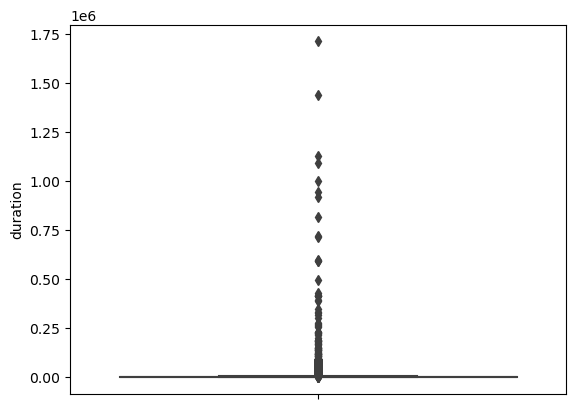

In [16]:
sns.boxplot(y=df_raw['duration'])

Removing outliers based on the above plot. We can clearly see that the we have number of fewer records that are above 5000 minutes. Filtering out those records along with additional filter to remove records over duration of 16.5 minutes.

(5690, 18)

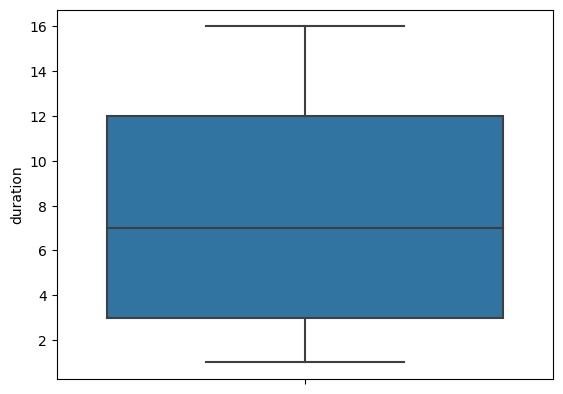

In [17]:
df_cleaned = df_raw[(df_raw['duration'] > 0) & (df_raw['duration'] < 16.5)]
sns.boxplot(y=df_cleaned['duration'])
df_cleaned.shape

In [18]:
df_casual_filter = df_cleaned[df_cleaned['member_casual'] == 'casual']
df_member_filter = df_cleaned[df_cleaned['member_casual'] == 'member']
print(df_casual_filter.shape)
print(df_member_filter.shape)

(1129, 18)
(4561, 18)


## 3.4) Check Unbalanced Data

#### Given our data is imbalanced, we might want to do re-sampling to adjust the proportion while training.

In [19]:
df_balanced = df_cleaned[['ride_id', 'member_casual']].groupby( 'member_casual' ).count().sort_values( 'ride_id' ).reset_index()
df_balanced['perc%'] = 100*np.round( ( df_balanced['ride_id'] / np.sum( df_balanced['ride_id'] ) ), 4 )
df_balanced

,member_casual,ride_id,perc%
0,casual,1129,19.84
1,member,4561,80.16


### Here we see that the data is pretty imbalanced. Rides with members are much more compared to casual. We have 3 ways to resolve this. 
1) Resampling <br />
2) Using F1 score and assigning more weigths to the minority <br />
3) SMOTETOmek <a href='https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTETomek.html'>details</a><br />
We will be looking at the third option. 

In [20]:
# Encoder
ohe = OneHotEncoder()

# Columns ( Categorical + Numerical )
cols_cat = df_cleaned.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] ).drop( ['ride_id', 'member_casual'], axis=1 ).columns.tolist()
cols_num = df_cleaned.select_dtypes( include=['int64', 'float64'] ).columns.tolist()

# One Hot Encoding Categorical
df_cleaned_dummy = pd.DataFrame( ohe.fit_transform( df_cleaned[cols_cat] ).toarray(), index=df_cleaned.index )

# joining back to original dataframe
df_cleaned_encoded = pd.concat( [df_cleaned[cols_num], df_cleaned_dummy], axis=1 )

SMOTETomek is a technique for addressing class imbalance in a dataset. It is an extension of the SMOTE (Synthetic Minority Oversampling Technique) method, which is a popular technique for oversampling a minority class in a dataset.The goal of this combination is to create a balanced dataset that is more representative of the true underlying distribution of the data.

In [21]:
# Oversampling ( SMOTE ) + Undersampling ( Tomek Links )
smt = SMOTETomek( sampling_strategy='auto', random_state=32 )
# apply
X_smt, y_smt = smt.fit_resample( df_cleaned_encoded, df_cleaned['member_casual'] )

# numerical data
df_smote_numerical = X_smt[ cols_num ]

# categorical data
df_smote_cats = X_smt.drop( cols_num, axis=1 )
df_smote_categorical = pd.DataFrame( ohe.inverse_transform( df_smote_cats ), columns=cols_cat, index=df_smote_cats.index )

# concat Numerical and Categorical dataset
df_smote_final = pd.concat( [df_smote_numerical, df_smote_categorical], axis=1 )
df_smote_final['member_casual'] = y_smt

### Checking to see if the data is balanced after oversampling and undersampling.

In [22]:
df_smote_final['member_casual'].value_counts(normalize=True )

member    0.5
casual    0.5
Name: member_casual, dtype: float64

## 3.5) Rename Columns 

In [23]:
df_smote_final.columns

Index(['start_lat', 'start_lng', 'end_lat', 'end_lng', 'year', 'month', 'day',
       'day_of_week', 'distance', 'hour_of_day', 'duration', 'rideable_type',
       'holidays', 'season', 'member_casual'],
      dtype='object')

### since the column names are pretty readable, we will keep the column names as the same. 

## 3.6) Descriptive Analysis

In [24]:
df_final_balanced = df_smote_final.copy()

### 3.6.1) Numerical and categorical variables 

In [25]:
num_attributes = df_final_balanced.select_dtypes(include=['int64', 'float64'] )
cat_attributes = df_final_balanced.select_dtypes(exclude=['int64', 'float64','datetime64[ns]'] )
time_attributes = df_final_balanced.select_dtypes( include=['datetime64[ns]'] )

#### Helper Functions

The jupyter_settings function sets various display and plotting settings for a Jupyter Notebook. These settings include:

Configuring the matplotlib library to display plots inline
Setting the style of the plots to "bmh" (Bayesian Methods for Hackers)
Setting the size of the figures to 25 x 12
Setting the font size to 24
Displaying the data frame with no limits on the number of columns or rows displayed
Setting the Seaborn library to its default style

The cramer_v function calculates the Cramer's V statistic, which is used to determine the association between two categorical variables. The function takes two arguments: x and y, which are the two categorical variables. The function first calculates a contingency table (also known as a cross-tabulation) of the two variables and calculates the chi-squared statistic to determine the association between the variables. The Cramer's V statistic is then calculated based on the chi-squared statistic and the number of categories in x and y.

In [43]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
def cramer_v(x, y):
    # Compute the contingency matrix
    cm = pd.crosstab( x, y ).values
    # Total number of samples
    n = cm.sum()
    # Number of rows and columns in the contingency matrix
    r, k = cm.shape
    # Chi-squared test for independence
    chi2 = ss.chi2_contingency( cm )[0]
    # Corrected chi-squared test
    chi2corr = max( 0, chi2 - (k-1)*(r-1)/(n-1) )

    # Corrected number of columns
    kcorr = k - (k-1)**2/(n-1)
    # Corrected number of rows
    rcorr = r - (r-1)**2/(n-1)

    # Cramer's V
    return np.sqrt( (chi2corr/n) / ( min( kcorr-1, rcorr-1 ) ) )
    

#### 3.6.1.1) Numerical Variables

This code is used to calculate and analyze the central tendency and dispersion of a set of numerical attributes. The set of numerical attributes is stored in a Pandas DataFrame object called num_attributes.

The central tendency of the numerical attributes is calculated using the mean and median. These values are stored in the ct1 and ct2 DataFrames, respectively.

The dispersion of the numerical attributes is calculated using several statistics: standard deviation, minimum, maximum, range, skew, and kurtosis. These values are stored in the d1, d2, d3, d4, d5, and d6 DataFrames, respectively.

Finally, the central tendency and dispersion statistics are concatenated into a single DataFrame called ct. The columns of this DataFrame include: attributes, min, max, range, mean, median

In [27]:
# Central Tendency
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# Concatenate
ct = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
ct.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
ct

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,start_lat,40.706575,40.754542,0.047966,40.732324,40.733670,0.011402,0.031652,-1.009591
1,start_lng,-74.088964,-74.023939,0.065025,-74.041869,-74.038914,0.013086,-1.040405,0.621296
2,end_lat,40.706575,40.799484,0.092909,40.732345,40.733670,0.011475,0.093389,-0.683758
3,end_lng,-74.088964,-73.955613,0.133351,-74.041834,-74.038914,0.013187,-0.933538,1.091156
4,year,2022.000000,2022.000000,0.000000,2022.000000,2022.000000,0.000000,0.000000,0.000000
5,month,1.000000,12.000000,11.000000,7.411804,8.000000,2.774812,-0.277408,-0.693071
6,day,1.000000,31.000000,30.000000,15.513465,15.000000,8.783390,0.043350,-1.197731
7,day_of_week,0.000000,6.000000,6.000000,2.997083,3.000000,1.907474,-0.067725,-1.195124
8,distance,0.000000,10.508788,10.508788,0.006439,0.000000,0.188245,49.257112,2488.704567
9,hour_of_day,0.000000,23.966667,23.966667,14.493548,15.632463,5.156658,-0.591819,-0.229227


#### 3.6.1.2) Categorical

This code is used to generate a summary of the statistics for a set of categorical attributes stored in a Pandas DataFrame object called cat_attributes.

The drop method is used to remove the 'holidays' and 'season' columns from the cat_attributes DataFrame. The axis parameter is set to 1 to specify that the operation should be performed along the columns axis.

The describe method is then applied to the resulting DataFrame to generate a summary of the statistics for the remaining columns of the cat_attributes DataFrame. This summary includes the count, unique values, top value, and frequency of the top value for each column.

Overall, this code provides a concise and efficient way to generate a summary of the statistics for a set of categorical attributes, while excluding specific columns as desired.

In [28]:
cat_attributes.drop(['holidays','season'], axis=1 ).describe()

,rideable_type,member_casual
count,8912,8912
unique,3,2
top,classic_bike,member
freq,6261,4456


### 3.6.2) Predictors and Class Correlation

This code is calculating the Cramer's V correlation coefficient between pairs of categorical attributes.

<AxesSubplot: >

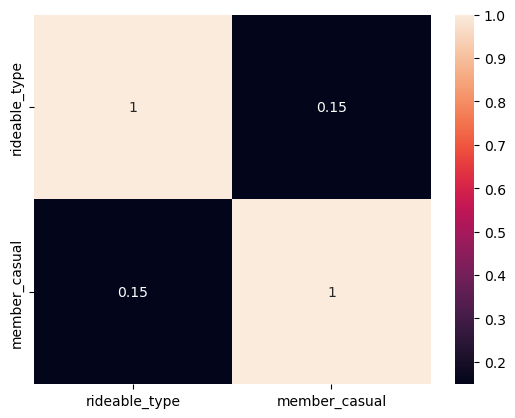

In [29]:
# list of categorical attributes
cat_attributes_list = cat_attributes.drop( ['holidays','season'], axis=1 ).columns.tolist()

corr_dict = {}
for i in range( len( cat_attributes_list ) ):
    corr_list = []
    for j in range( len( cat_attributes_list ) ):
        #print( 'Ref: {} - Feat: {}'.format( cat_attributes_list[i], cat_attributes_list[j] ) )
        ref = cat_attributes_list[i]
        feat = cat_attributes_list[j]
        
        # correlation between two categorical variables
        corr = cramer_v( cat_attributes[ ref ], cat_attributes[ feat ] )
        
        # append to a list
        corr_list.append( corr )
        
    # append the correlation list for each ref attributes
    corr_dict[ref] = corr_list

d = pd.DataFrame( corr_dict )
d = d.set_index( d.columns )
sns.heatmap( d, annot=True )

## 3.7) Data Analysis 

### 3.7.1) Univariate Analysis ( Descriptive Statistics)

#### 3.57.1.1) Response Variable

A pie chart showing the distribution of casual and member users in the bike sharing dataset.The data is filtered using the df_final_balanced data frame and creating two separate data frames df_casual_filter and df_member_filter based on the 'member_casual' column values

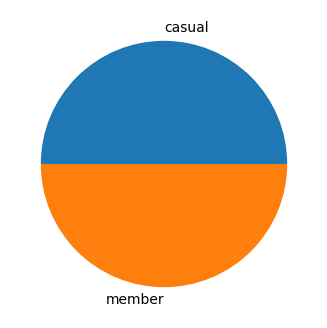

In [30]:
df_casual_filter = df_final_balanced[df_final_balanced['member_casual'] == 'casual']
df_member_filter = df_final_balanced[df_final_balanced['member_casual'] == 'member']
casual_count = df_casual_filter.shape[0]
member_count = df_member_filter.shape[0]
classes = ['casual','member']
counts = [casual_count, member_count]

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(4)

# Create the pie chart
plt.pie(counts, labels=classes)
# Show the plot
plt.show()

A series of plots to first explore the trips distribution over day-of-week and month.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6')])

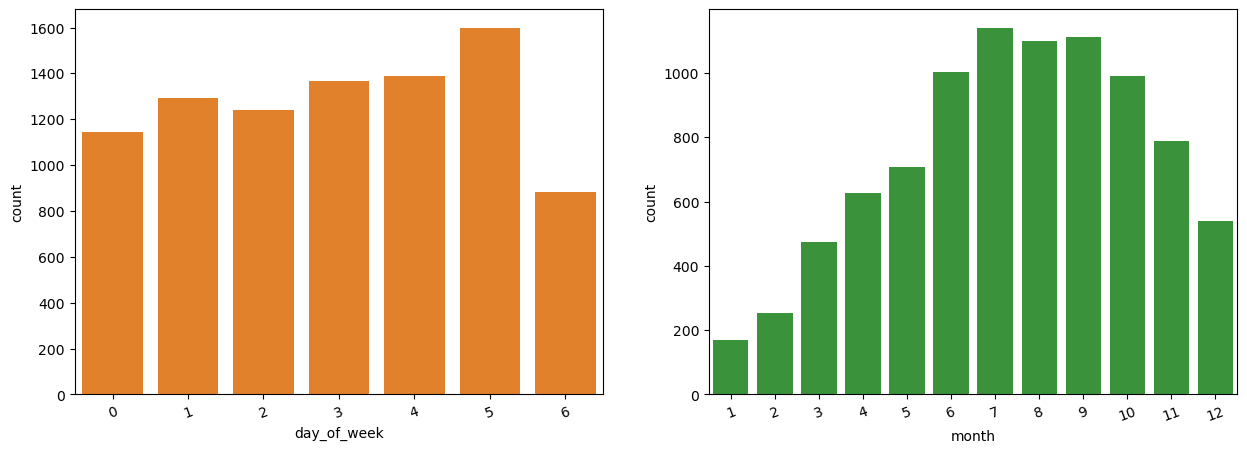

In [31]:
#Getting distribution using Seaborn bar plot 
plt.figure(figsize = [15,5])
base_color1=sns.color_palette()[1]
base_color2=sns.color_palette()[2]

# trip distribution over months
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
g=sns.countplot(data = df_final_balanced, x = 'month', color=base_color2)
plt.xticks(rotation=20);

# trip distribution over weekday
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
g=sns.countplot(data = df_final_balanced, x = 'day_of_week', color=base_color1)
plt.xticks(rotation=20)

Looking in combined with the trip distribution over day of week plot, the majority of rides happened on tuesday - friday and primary usage is probably for commuting. In the 11 months in 2022, August had the most ride trips compared to the others, but overall it was the most popular during summer time (June-October), probably due to the weather in the area.

### Trip distribution over bike type

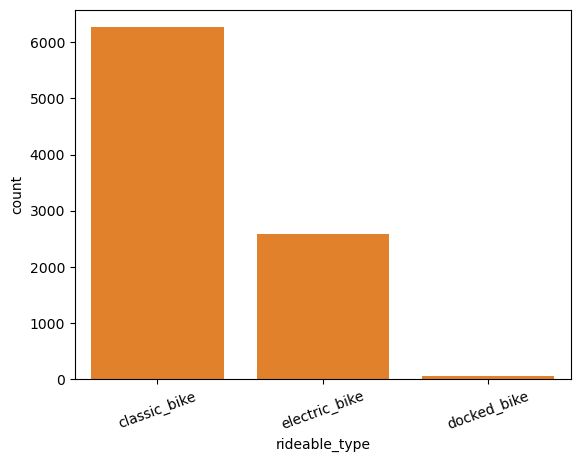

In [32]:
g=sns.countplot(data = df_final_balanced, x = 'rideable_type', color=base_color1)
plt.xticks(rotation=20);

The above plot will display the number of occurrences for each category in the "rideable_type" column in a bar graph format, with the categories on the x-axis and the count of occurrences on the y-axis. Classic bike stands out among the bike types.

### 3.7.2) Bivariate Analysis 

**Ridable Type**

In [44]:
aux01 = pd.crosstab( df_final_balanced['member_casual'], df_final_balanced['rideable_type'] ).apply( lambda x: 100*np.round( x / x.sum(), 2 ), axis=1 )
data = []
for x in aux01.columns:
   data.append(go.Bar(name=str(x), x=aux01.index, y=aux01[x]))

figure = go.Figure(data)
figure.update_layout(
    title={
        'text': "Rideable Type Usage Percentage by Member Type",
        'font': {'size': 24},
        'x': 0.5,
        'xanchor': 'center'
    },
    barmode = 'stack'
)
figure.show()

# Correlation: Cramer's V
r = cramer_v( df_final_balanced['member_casual'], df_final_balanced['rideable_type'] )
print( 'Correlation: {}'.format( r ) )


Correlation: 0.14835983511706655


**From the above, we see that casual members ride less classic bikes compared to members and more electric bikes compared to members.**

### Holidays

In [45]:
aux01 = pd.crosstab( df_final_balanced['member_casual'], df_final_balanced['holidays'] ).apply( lambda x: 100*np.round( x / x.sum(), 2 ), axis=1 )
data = []
for x in aux01.columns:
    data.append(go.Bar(name=str(x), x=aux01.index, y=aux01[x]))

figure = go.Figure(data)

# Update the layout of the plot to include a title
figure.update_layout(
    title={
        'text': "Ride Percentage on Holidays by Member Type",
        'font': {'size': 24},
        'x': 0.5,
        'xanchor': 'center'
    }
)

figure.show()

# Calculate the correlation using Cramer's V
r = cramer_v( df_cleaned['member_casual'], df_cleaned['holidays'] )
print( 'Correlation: {}'.format( r ) )


Correlation: 0.028525043667269483


**From the above, we see that there is not much difference between casual and member types. The number of rides during normal days is much greater than casual members.**

### Season

In [46]:
aux01 = pd.crosstab( df_cleaned['member_casual'], df_cleaned['season'] ).apply( lambda x: 100*np.round( x / x.sum(), 2 ), axis=1 )
data = []
for x in aux01.columns:
   data.append(go.Bar(name=str(x), x=aux01.index, y=aux01[x]))

figure = go.Figure(data)
figure.update_layout(
    title={
        'text': "Ride Percentage by Season and Member Type",
        'font': {'size': 24},
        'x': 0.5,
        'xanchor': 'center'
    }
)
figure.show()

# Correlation: Cramer's V
r = cramer_v( df_final_balanced['member_casual'], df_final_balanced['season'] )
print( 'Correlation: {}'.format( r ) )

Correlation: 0.1646366679538271


**Based on the above plot, we see that Summer season is best to casual members and Autumn is best for member types.**

### 3.5.3) - EXPLORATORY DATA ANALYSIS (EDA) ###

In [26]:
df_exploratory = df_smote_final.copy()

**1) Do members travel greater distances?**

In [27]:
df1 = df_exploratory[['distance', 'member_casual']].groupby( 'member_casual' ).mean().reset_index()
fig = px.bar(df1, x='member_casual', y='distance', color='member_casual', title='Casual vs Bikers member ')
fig.show()

As you can see from the above, casual bike users travel greater distance than member bike users.

**2) Do casual bikers ride more on holidays?**

In [28]:
fig = px.histogram(df_smote_final, x="holidays", color="member_casual")
fig.show()

**As we can see above, casual bikers ride more on a holiday and normal day. However, the total number of bikers are relatively smaller on a holiday.**

**3) Do member bikers ride more on weekdays?**

In [29]:
df2 =  df_smote_final.groupby(by=["day_of_week", "member_casual"]).size().reset_index(name="counts")
map_week = {0: 'Monday', 1: 'Tuesday', 2:'Wednesday', 3:'Thursday',4:'Friday',5:'Saturday', 6:'Sunday'}
df2['day_of_week'] = df2['day_of_week'].map(map_week)
fig = px.bar(df2, x="day_of_week", y="counts",color="member_casual",)
fig.show()

**Member bikers do ride more of weekdays compared to weekends.**

**4) Do member bikers ride consistently over the months?**

In [30]:
df_1 = df_smote_final.groupby(by=["month", "member_casual"]).size().reset_index(name="counts")
map_month = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October', 
    11: 'November',
    12: 'December'
}
df_1['month'] = df_1['month'].map(map_month)
fig = px.bar(df_1, x="month", y="counts",color="member_casual",barmode="group")
fig.show()

**Member riders have been consistent over a period of time with respect to casual users. Overall usage of bike riding members have incresae in the months starting June to November.**

**5) Do casual bikers travel for long period of time?**

In [31]:
aux02 = df_smote_final[['duration', 'member_casual']].groupby( 'member_casual' ).mean().reset_index()
px.bar(aux02,x='member_casual',y='duration', color='member_casual')

**Casual bikers and member bikers ride for the same amount of time**

**6) Do member bikers ride more during daylight hours?**

In [32]:
df_3 = df_smote_final[df_smote_final['member_casual']=='member']
df_3 = df_3.groupby(by=["hour_of_day", "member_casual"]).size().reset_index(name="counts")
fig = px.bar(df_3, x="hour_of_day", y="counts" ,color='member_casual')
fig.show()

**From the above, we can see that the busy hours are between 6am and 8:30pm.**

**7) Do member bikers use more in the morning or late afternoon?**

<AxesSubplot: xlabel='hour_of_day_0', ylabel='count'>

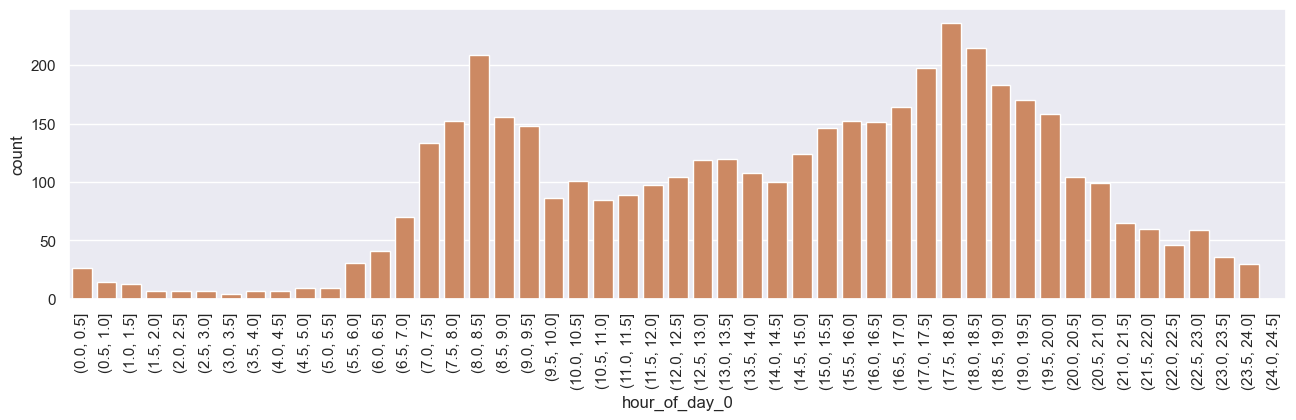

In [35]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
aux03 = df_smote_final.copy()
base_color1=sns.color_palette()[1]
base_color2=sns.color_palette()[2]


plt.subplot(2,1,1)
bins = list( np.arange(0, 25, 0.5) )
aux03['hour_of_day_0'] = pd.cut( aux03['hour_of_day'], bins=bins )
plt.xticks( rotation=90)
sns.countplot( x='hour_of_day_0', data=aux03[aux03['member_casual']=='member'],color=base_color1, 
             )

**From the above, we can clearly see that the member bikers ride more during afternoon compared to morning.**

<AxesSubplot: xlabel='hour_of_day_0', ylabel='count'>

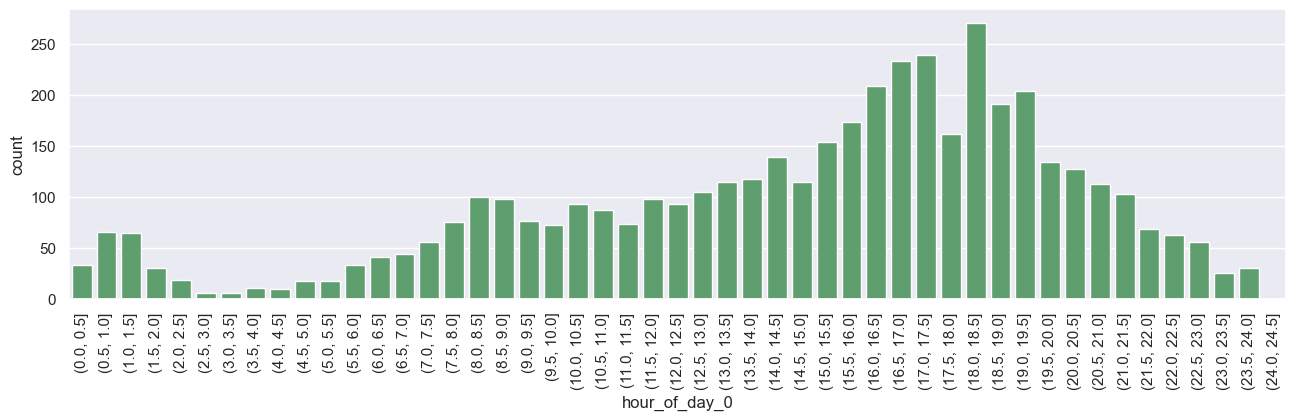

In [36]:
plt.subplot(2,1,2)
bins = list( np.arange(0, 25, 0.5) )
aux03['hour_of_day_0'] = pd.cut( aux03['hour_of_day'], bins=bins )
plt.xticks( rotation=90)
sns.countplot( x='hour_of_day_0', data=aux03[aux03['member_casual']=='casual'], color=base_color2)

**Similar to member bikers, casual bikers ride more during afternoon compared to early morning.**

**8) Do casual bikers ride more in the summer compared to other seasons?**

In [37]:
df12 =  df_smote_final.groupby(by=["season", "member_casual"]).size().reset_index(name="counts")
fig = px.bar(df12, x="season", y="counts",color="member_casual",)
fig.show()

**From the above, it is pretty clear that casual bike riders ride more during the summer season compared to other seasons.**

**9) How do the rideable types vary in weekdays?**

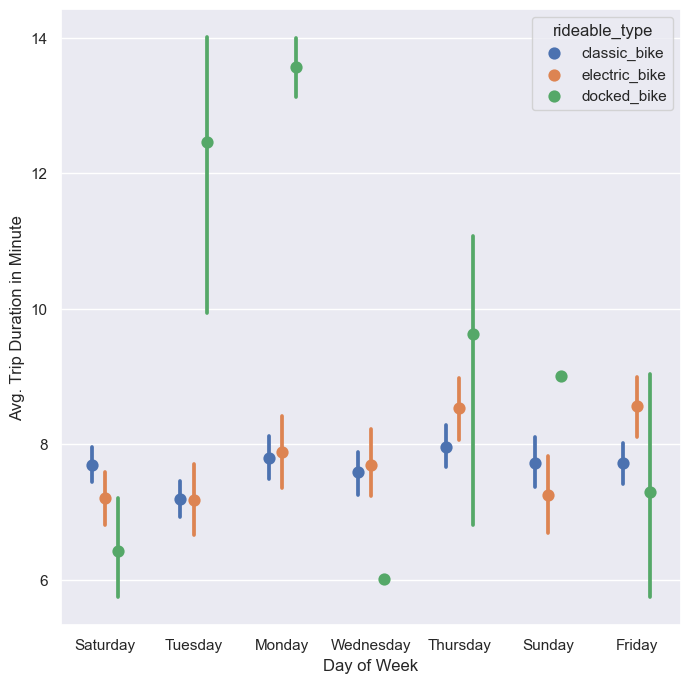

In [38]:
plt.figure(figsize = [8, 8])
df_4 = df_smote_final[['day_of_week','duration','rideable_type']]
df_4['day_of_week'] = df_4['day_of_week'].map(map_week)
sns.pointplot(data=df_4, x='day_of_week', y='duration', hue='rideable_type', dodge=0.3, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

**From the above, we can see that the docked bike is used more during wednesday, thursday and friday.**

**10) Compare the bike type usage on normal day with a holiday.**

<AxesSubplot: xlabel='holidays'>

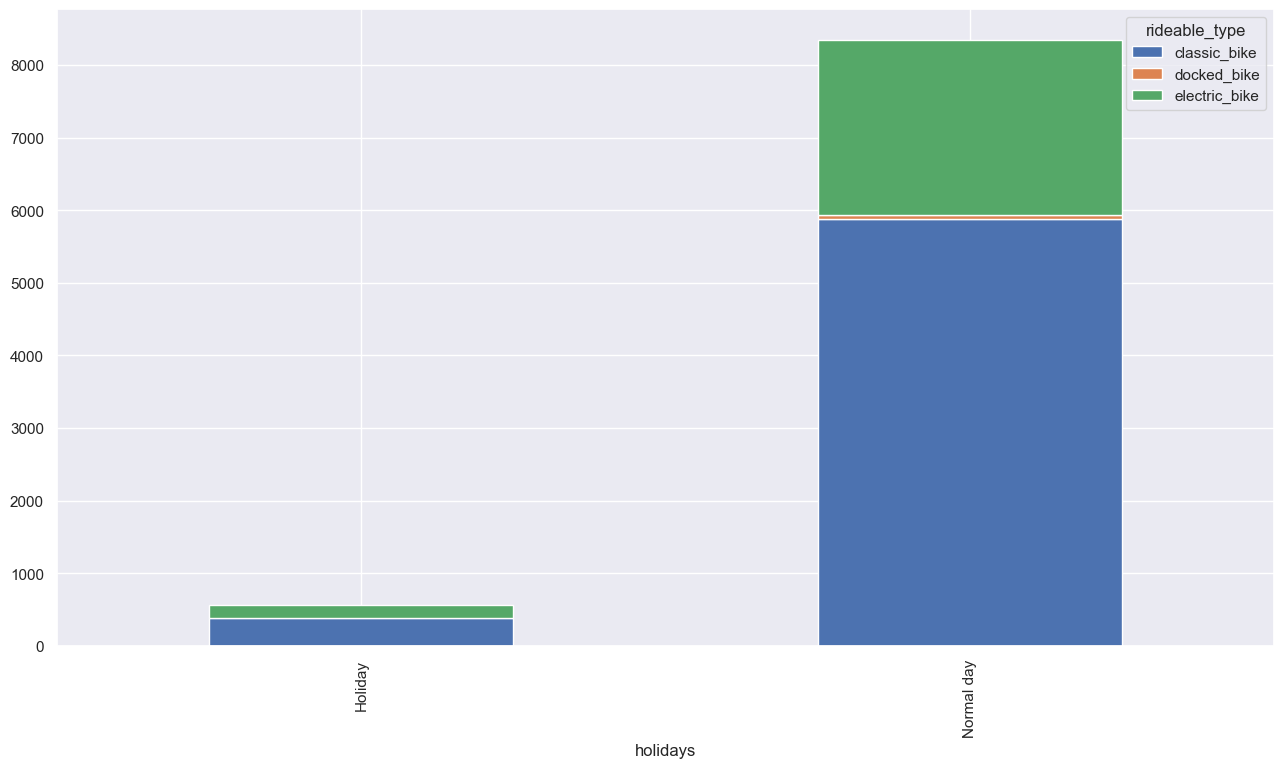

In [39]:
 df_smote_final.groupby(['holidays', 'rideable_type'])['holidays'].count().unstack('rideable_type').plot(kind='bar', stacked=True)

**From the above, we can see that the classic bike and electric bikes are driven more compared to docked bike.** 

**The relationship between the multiple variables plotted are visualized altogether and information are presented combined.The efficient/short period of usage for royal customers corresponds to their high concentration on Monday through Friday, indicating the use is primarily for the work commute. The more relaxing and flexible pattern of customer use shows that they're taking advantage of the bike-sharing system quite different from the royal customers, heavily over weekends and in the afternoon, for city tour or leisure purpose probably.**

### 3.5.3 Multivariate Analysis

A pairplot in Python's seaborn library is a multivariate visualization technique that allows you to plot all pairs of variables in a dataset against each other. It creates a matrix of scatterplots, where each scatterplot represents the relationship between a pair of variables.

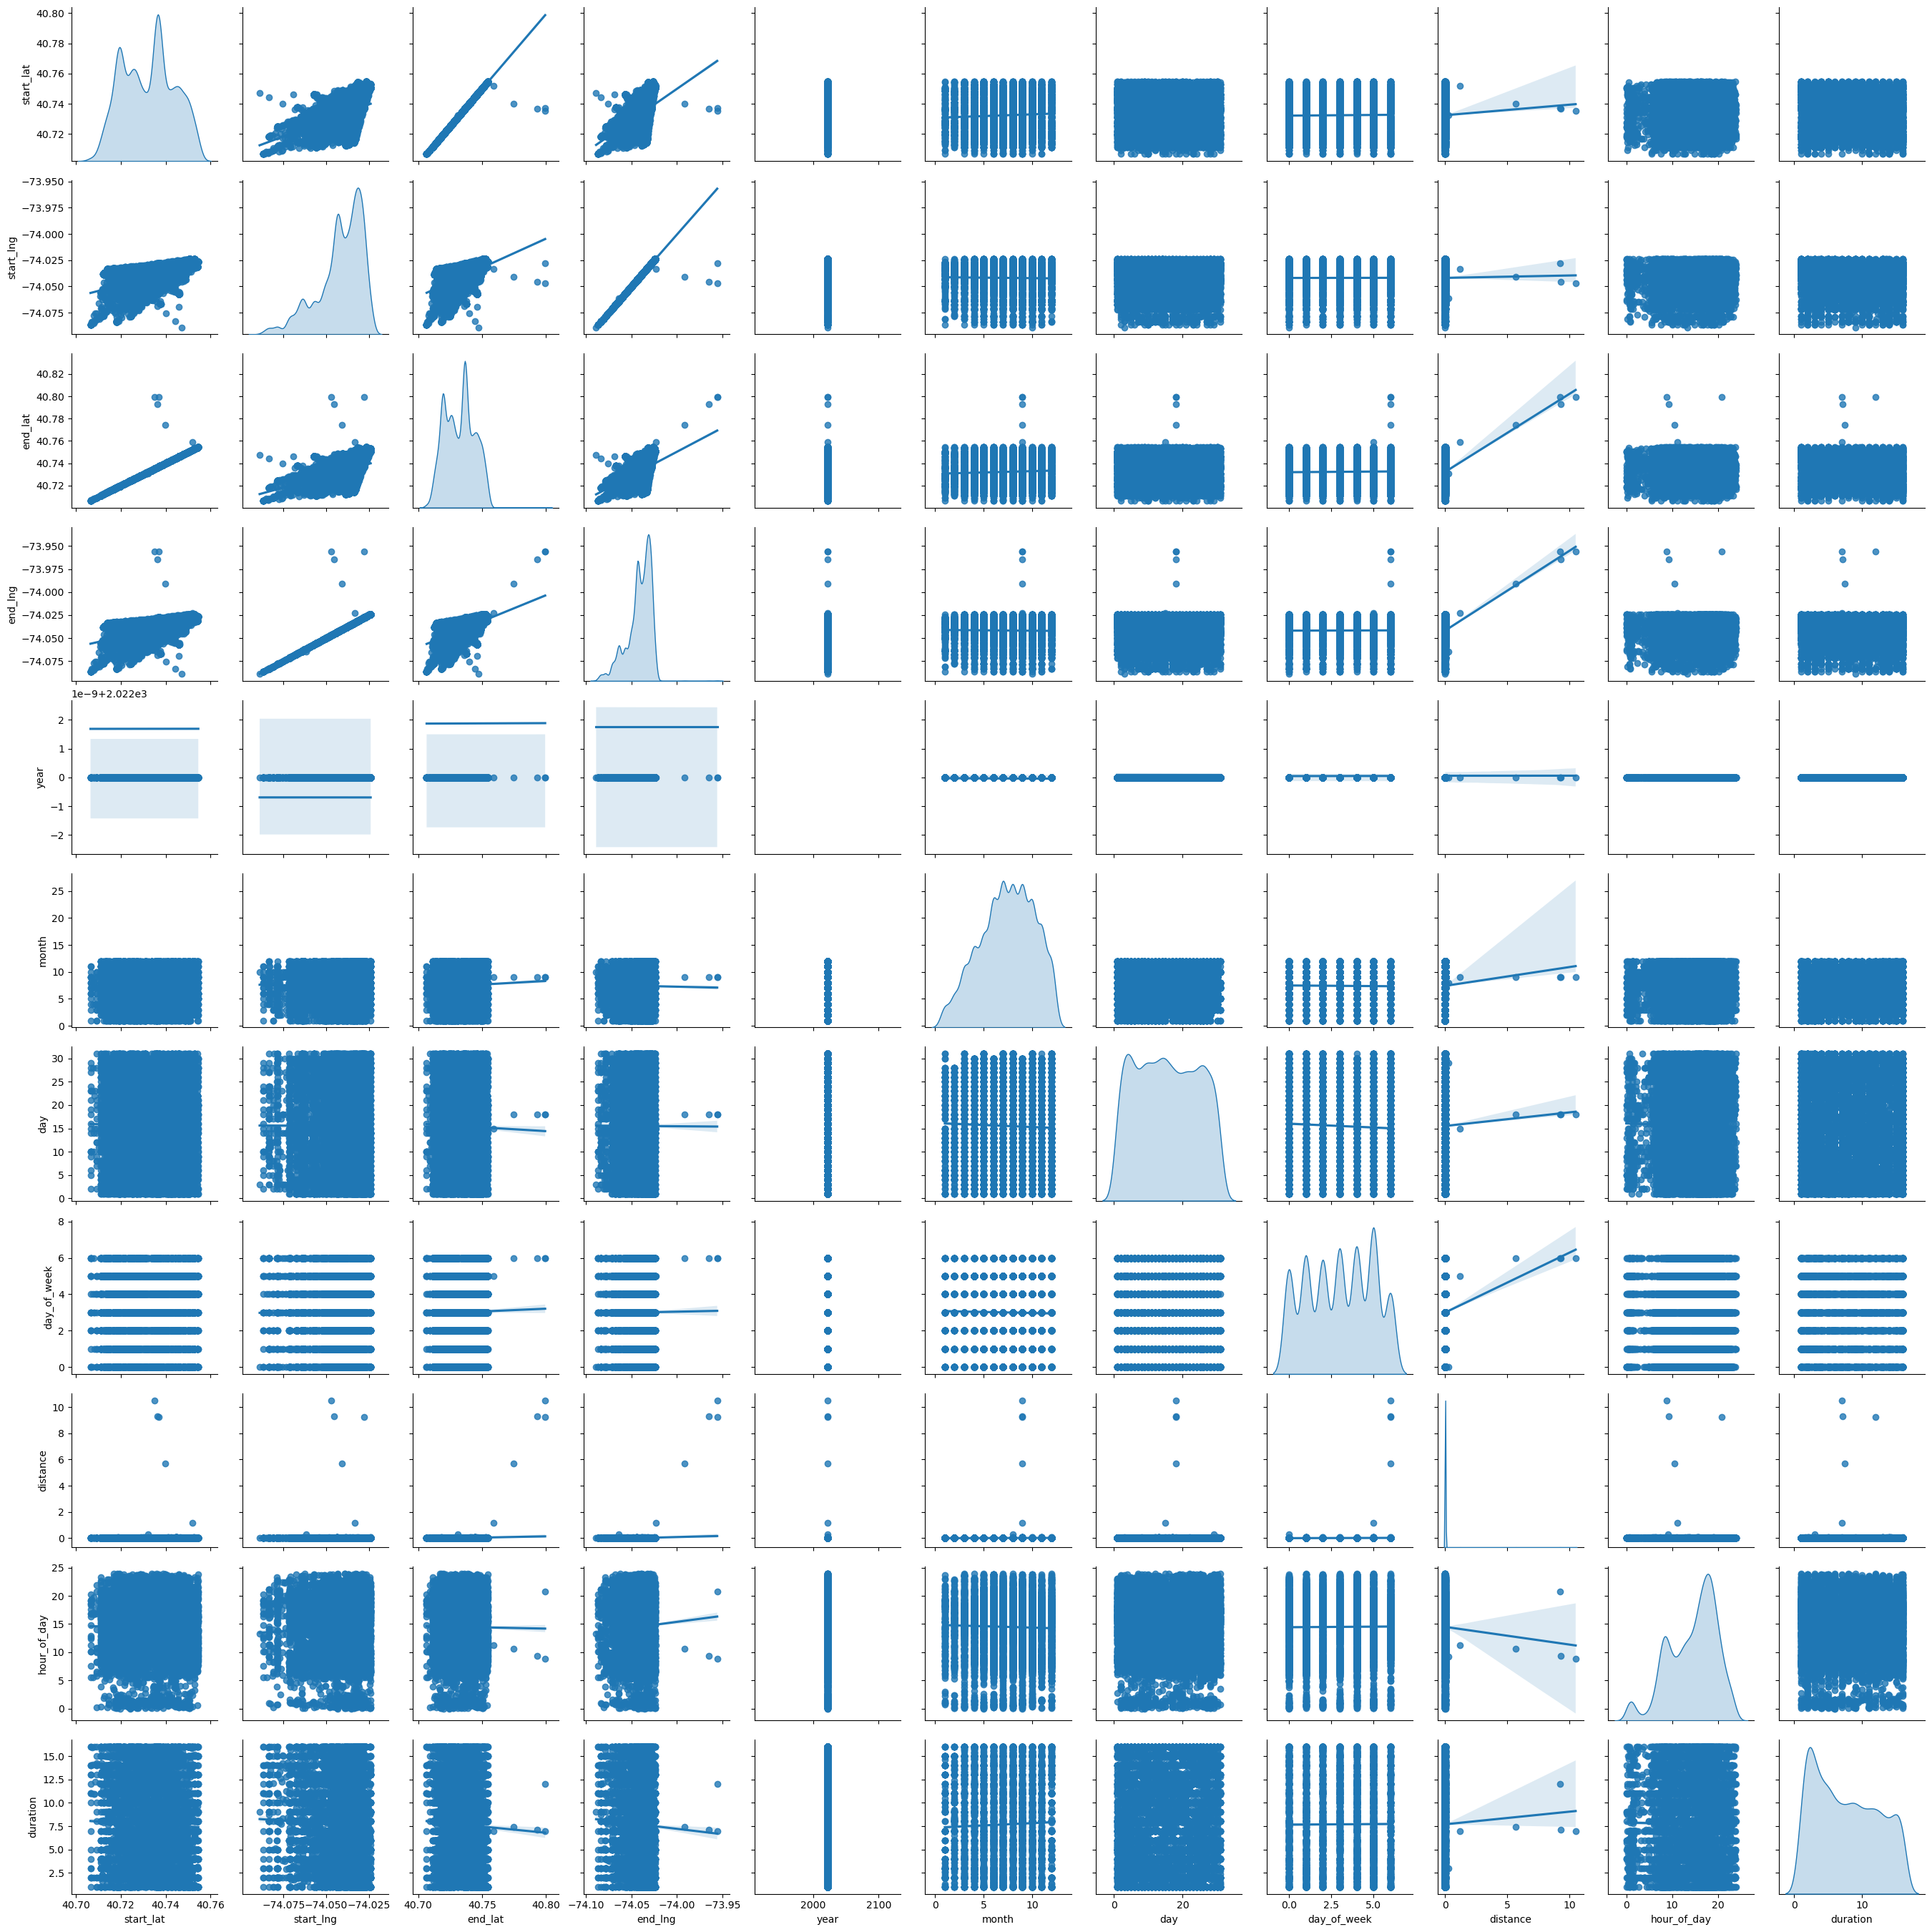

In [37]:
#Lets first visualize the variables involved
sns.pairplot(df_final_balanced, kind="reg", diag_kind="kde")

Looking at the KDE plot, we see that the plots of single variable are most not normally distributed. The start_long, start_lat seem to be heavily concentrated at some particular locations and few outliers do exist. The same follows for end_lat and end_long. The distance travelled is pretty consistent too and few outliers exist with respect to variables start_lat, stat_lng,end_lat and end_lng. Most of them travelled for less than an hour, based on the duration. 

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [47]:
df_formatted = df_final_balanced.copy()

In [48]:
df_formatted.drop( 'year', axis=1, inplace=True )

## 4.1 Rescaling

### Since we took out the outliers already, we will not be making any changes to the duration column. 

In [49]:
fig = px.box(df_formatted, y="duration", points='all')
fig.show()

In [50]:
fig = px.box(df_formatted, y="distance", points='all')
fig.show()

In [51]:
ss = StandardScaler()
# durantion
df_formatted['duration'] = ss.fit_transform( df_formatted[['duration']].values )

# distance
df_formatted['distance'] = ss.fit_transform( df_formatted[['distance']].values )

## 4.2 Encoding

In [43]:
# rideable_type
df_formatted = pd.get_dummies( df_formatted, prefix=['rideable_type'], columns=['rideable_type'] )

# holidays
df_formatted = pd.get_dummies( df_formatted, prefix=['holidays'], columns=['holidays'] )

## 4.3 Transformation

Since I am trying to predict the demand for a product based on past sales data, it might be helpful to include features that capture the day of the week and the week of the month.We have couple of ways to do it. 

1) One way to do this is to create a new feature for each day of the week, with a value of 1 for the corresponding day and 0 for all other days. This approach treats the days of the week as discrete categories, which may not capture the full range of variation in the data.

2) Alternatively, we could use sine and cosine functions to represent the week of the day in a continuous manner. To do this, we would create two new features: one for the sine transformation and one for the cosine transformation. These features would take on values that depend on the day of the week and the week of the month.

Incorporating these features into your machine learning model could help to capture patterns in the data that are related to the day of the week and the week of the month. 


In [44]:
def transform_variable(day, total):
  # Convert the day of the week to an angle in radians, with Sunday as the starting point
  angle = 2 * np.pi * day / total
  
  # Compute the sine and cosine transformations of the angle
  sine = np.sin(angle)
  cosine = np.cos(angle)
  
  return sine, cosine

In [45]:
# month
sine1,cosine1 = transform_variable(df_formatted['month'], 4)
df_formatted['month_sin'] = sine1
df_formatted['month_cos'] = cosine1

sine2,cosine2 = transform_variable(df_formatted['day'], 30)
df_formatted['day_sin'] = sine2
df_formatted['day_cos'] = cosine2

sine3,cosine3 = transform_variable(df_formatted['day_of_week'], 7)
df_formatted['day_of_week_sin'] = sine3
df_formatted['day_of_week_cos'] = cosine3

sine4,cosine4 = transform_variable(df_formatted['hour_of_day'], 24)
df_formatted['hour_of_the_day_sin'] = sine4
df_formatted['hour_of_the_day_cos'] = cosine4

season_dict = { 'Winter': 0, 'Spring': 1, 'Summer':2, 'Autumn':3 }
df_formatted['season'] = df_formatted['season'].map(season_dict)

sine5,cosine5 = transform_variable(df_formatted['season'],4)
df_formatted['season_sin'] = sine5
df_formatted['season_cos'] = cosine5

cols_drop = ['month', 'day', 'day_of_week', 'hour_of_day', 'season']
df_formatted = df_formatted.drop( cols_drop, axis=1 )

In [46]:
df_formatted.head()

,start_lat,start_lng,end_lat,end_lng,distance,duration,member_casual,rideable_type_classic_bike,rideable_type_docked_bike,rideable_type_electric_bike,...,month_sin,month_cos,day_sin,day_cos,day_of_week_sin,day_of_week_cos,hour_of_the_day_sin,hour_of_the_day_cos,season_sin,season_cos
0,40.750604,-74.024020,40.750604,-74.024020,-0.034203,-1.452189,member,1,0,0,...,1.0,6.123234e-17,0.207912,0.978148,-0.974928,-0.222521,0.652760,0.757565,0.0,1.0
1,40.715178,-74.037683,40.715178,-74.037683,-0.034203,-0.801659,member,1,0,0,...,1.0,6.123234e-17,-0.866025,0.500000,0.781831,0.623490,-0.938191,-0.346117,0.0,1.0
2,40.715178,-74.037683,40.715178,-74.037683,-0.034203,0.933087,member,1,0,0,...,1.0,6.123234e-17,-0.866025,0.500000,0.781831,0.623490,-0.944089,0.329691,0.0,1.0
3,40.715178,-74.037683,40.715178,-74.037683,-0.034203,0.065714,member,0,0,1,...,1.0,6.123234e-17,-0.406737,-0.913545,0.000000,1.000000,-0.224951,-0.974370,0.0,1.0
4,40.715178,-74.037683,40.715178,-74.037683,-0.034203,-0.584816,member,1,0,0,...,1.0,6.123234e-17,-0.951057,0.309017,0.000000,1.000000,-0.979925,-0.199368,0.0,1.0


## 4.4) Feature Selection

In [47]:
X = df_formatted.drop( ['member_casual'], axis=1)
y = df_formatted['member_casual'] 

# split traininset between train and test
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=43, stratify=y )

**We will use Random Forest Classifier to select the features**

In [48]:
model = RandomForestClassifier()
#Create the RFE object and specify the number of features to select
rfe = RFE(model, n_features_to_select=10)
# Fit the RFE object to the data
rfe.fit(X, y)
# Print the selected feature\s
selected_features = X.columns[rfe.support_]
selected_features

Index(['start_lat', 'start_lng', 'end_lat', 'end_lng', 'duration', 'day_sin',
       'day_cos', 'day_of_week_sin', 'hour_of_the_day_sin',
       'hour_of_the_day_cos'],
      dtype='object')

In [49]:
#create an array of selected features
rf_features = np.array(selected_features)

In [50]:
#create an array of unselected features
rf_features_not_selected = list(np.setdiff1d( X_train.columns, rf_features ) )

## 4.5) Machine Learning Modeling

In [51]:
x_train = X_train[rf_features]
x_test = X_test[rf_features]

r_seed = 42

There are several types of machine learning models that can be used for classification tasks. We will be seeing the following ones below. 

**Logistic Regression** : This is a linear model that is used for binary classification tasks. It is based on the idea of finding the probability of an event occurring, given a set of independent variables.

**Decision Trees**: These are tree-based models that can be used for classification tasks. A decision tree makes decisions based on the feature values of an input.

**Support Vector Machines (SVMs)**: These are linear models that find the hyperplane in a high-dimensional space that maximally separates different classes. They are effective in high-dimensional spaces and are often used in text classification problems.

**K-Nearest Neighbors (KNN)**: This is a simple, non-parametric method that can be used for classification tasks. It works by finding the K data points in the training set that are closest to the sample, and using their labels to predict the label of the sample.

**Random Forests**: These are ensemble models that are composed of a large number of decision trees. They work by training multiple decision trees on random subsets of the data, and then averaging the predictions of all the trees to make a final prediction.

Before we begin lets define some helper functions that we will use to output the scores. We will be using this to determine the best model. 

**Helper Function**
We will use this function for generating output information that will be used across different machine learning models. 

In [52]:
def GenerateOutput(model_name,x_test,y_test, y_pred,model):
    # Accuracy - Precision - Recall - F1 Score - Kappa Metrics - Confusion Matrix
    print(classification_report( y_test, y_pred, digits=2) )
    #confusion matrix display
    lr_matrix = ConfusionMatrixDisplay.from_predictions(y_test,y_pred, display_labels=['casual', 'member'])

    # =========== Balanced Dataframe Metrics =============
    # Accuracy
    lr_acc = accuracy_score( y_test, y_pred)
    #print( 'Accuracy: {}'.format(lr_acc))


    # =========== Unbalanced Dataframe Metrics =============
    # Weighted F1-Score
    f1score = f1_score( y_test, y_pred, average='weighted' )
    #print( 'Weighted F1-Score: {}'.format( f1score ) )

    # Balanced Accuracy Score
    balanced_acc = balanced_accuracy_score( y_test, y_pred )
    #print( 'Balanced Accuracy Score: {}'.format( balanced_acc))
    
    if(model_name == "Baseline model"):
        model = DummyClassifier(random_state=r_seed)
    
    model.fit(x_train, y_train)
    
    y_pred_proba = model.predict_proba(x_test)[:, 1]
    # Calculate the AUC-ROC score
    auc = roc_auc_score(y_test, y_pred_proba)
    #print("AUC-ROC:", auc)
    
    df_score = CalculateScores(model_name,lr_acc,f1score,balanced_acc,auc)
    return df_score

def CalculateScores(model_name, accuracy, f1_score, balanced_accuracy, roc_auc):
    return pd.DataFrame( { 'Model Name': model_name,
                           'accuracy': accuracy,
                           'f1_score': f1_score,
                           'balanced_accuracy': balanced_accuracy,
                           'roc_auc score': roc_auc }, index=[0] ) 

def CrossVal_model(modelName, x_train, y_train):
    #As discussed above, we will be using stratifiedKfold to deal with imbalanced data. 
    fold = 5
    kfold = StratifiedKFold(n_splits=fold, shuffle=True,random_state=r_seed)

    accuracy_list = []
    balanced_acc_list = []
    weighted_f1_score_list = []
    auc_score_list = []
    iter = 1
    for train_index, test_index in kfold.split(x_train, y_train):
        X_train_f, X_test_f = x_train.iloc[train_index], x_train.iloc[test_index]
        y_train_f, y_test_f = y_train.iloc[train_index], y_train.iloc[test_index]

        if(modelName == "Logistic Regression"):
            #define a Logistic Regression model
            model = LogisticRegression(random_state=r_seed)
        if(modelName == "SVM"):
            model = svm.SVC(random_state=r_seed, probability=True)
        if(modelName == "DecisionTree"):
            model = DecisionTreeClassifier(random_state=r_seed)
        if(modelName == "RandomForestClassifier"):
            model = RandomForestClassifier(random_state=r_seed)
       
        
        #fit the model 
        model.fit(X_train_f, y_train_f)
        #prediction 
        y_f_pred = model.predict(X_test_f)
        #Accuracy 
        acc = accuracy_score(y_test_f, y_f_pred)
        accuracy_list.append(acc)
        # Balanced Accuracy
        balanced_acc = balanced_accuracy_score( y_test_f, y_f_pred )
        balanced_acc_list.append( balanced_acc )
        # Weighted F1-Score
        weighted_f1_score = f1_score( y_test_f, y_f_pred, average='weighted')
        weighted_f1_score_list.append( weighted_f1_score )
        
        #auc score 
        y_pred_proba = model.predict_proba(X_test_f)[:, 1]
        # Calculate the AUC-ROC score
        auc = roc_auc_score(y_test_f, y_pred_proba) 
        auc_score_list.append(auc)
        iter += 1

    print( 'Avg Balanced Accuracy: {}'.format( np.mean( balanced_acc_list ) ) )
    print( 'Avg Weighted F1-Score: {}'.format( np.mean( weighted_f1_score_list ) ) )
    print( 'Avg AUC-ROC Score: {}'.format( np.mean( auc_score_list ) ) )
    
    modelName = modelName + " - Cross Validation"
    
    return CalculateScores(modelName,np.mean(accuracy_list), 
                            np.mean( balanced_acc_list ),np.mean( weighted_f1_score_list),np.mean( auc_score_list))
    


### 4.5.1) Baseline model

**A baseline model in machine learning is a simple model that serves as a reference point or starting point for comparison with more complex models. The goal of a baseline model is to establish a minimum level of performance that any more complex model should aim to surpass.Since we already know that the data is unbalanced, we will use the same ratio to determine the model score**

In [53]:
target_list = y_test.drop_duplicates().sort_values().tolist()
target_weights = df_raw['member_casual'].value_counts( normalize=True ).sort_index().tolist()
# prediction
y_pred= random.choices(target_list, k=x_test.shape[0],
                              weights=target_weights )

In [54]:
x_test

,start_lat,start_lng,end_lat,end_lng,duration,day_sin,day_cos,day_of_week_sin,hour_of_the_day_sin,hour_of_the_day_cos
4844,40.719586,-74.043117,40.719586,-74.043117,-1.018502,0.951057,-0.309017,0.974928,0.722364,-0.691513
5648,40.732678,-74.039780,40.732678,-74.039780,-1.235346,0.406737,0.913545,-0.974928,-0.847936,0.530098
1275,40.736982,-74.027781,40.736982,-74.027781,-0.151129,-0.994522,0.104528,0.000000,-0.990866,-0.134851
2995,40.740973,-74.028603,40.740973,-74.028603,-1.452189,0.406737,0.913545,0.781831,-0.740218,0.672367
867,40.736982,-74.027781,40.736982,-74.027781,-1.018502,-0.743145,-0.669131,0.781831,-0.678801,0.734323
...,...,...,...,...,...,...,...,...,...,...
8135,40.720594,-74.044804,40.720515,-74.044644,0.707156,0.207912,0.978148,-0.781831,-0.881040,-0.473042
2453,40.740802,-74.042521,40.740802,-74.042521,1.149930,0.951057,-0.309017,0.781831,-0.968148,0.250380
6820,40.730594,-74.049641,40.730594,-74.049641,-1.137480,0.207912,-0.978148,0.781831,0.641254,-0.767329
8444,40.733142,-74.060147,40.733142,-74.060147,0.463897,-0.866025,0.500000,0.781831,-0.963055,0.269303


### Performance

              precision    recall  f1-score   support

      casual       0.50      0.35      0.41      1337
      member       0.50      0.65      0.56      1337

    accuracy                           0.50      2674
   macro avg       0.50      0.50      0.49      2674
weighted avg       0.50      0.50      0.49      2674



,Model Name,accuracy,f1_score,balanced_accuracy,roc_auc score
0,Baseline model,0.497008,0.485199,0.497008,0.5


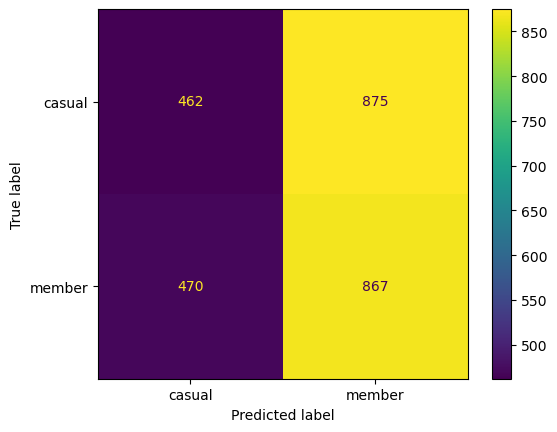

In [55]:
df_score_base = GenerateOutput("Baseline model",x_test,y_test, y_pred, DummyClassifier())
df_score_base

### 4.5.2) Logistic Regression

In [56]:
#model definition
mlm_lr = LogisticRegression(random_state=r_seed)
#fit the model
mlm_lr.fit(x_train, y_train)

LogisticRegression(random_state=42)

### 4.5.2.1) Logistic Regression Performance 

In [57]:
y_pred = mlm_lr.predict(x_test)

              precision    recall  f1-score   support

      casual       0.57      0.58      0.58      1337
      member       0.58      0.57      0.57      1337

    accuracy                           0.57      2674
   macro avg       0.57      0.57      0.57      2674
weighted avg       0.57      0.57      0.57      2674



,Model Name,accuracy,f1_score,balanced_accuracy,roc_auc score
0,Logistic Regression,0.57442,0.574392,0.57442,0.611239


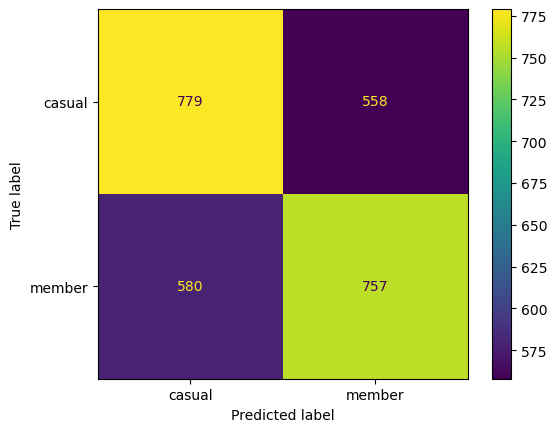

In [58]:
df_score = GenerateOutput("Logistic Regression",x_test,y_test, y_pred,mlm_lr)
df_score

### 4.5.3) Logistic Regression - Cross Validation

StratifiedKFold is a type of cross-validation technique used to evaluate the performance of machine learning models. It is a variant of KFold, which divides the data into a specified number of folds (or "splits") and iteratively trains and evaluates the model on each fold. <br />
The key difference between StratifiedKFold and KFold is that StratifiedKFold ensures that the proportion of samples belonging to each class is approximately the same across all the folds. This is particularly useful when the data is imbalanced, meaning that one class is significantly more prevalent than the others.

In [59]:
df_score2 = CrossVal_model("Logistic Regression", x_train, y_train)
df_score2

Avg Balanced Accuracy: 0.5708554554060172
Avg Weighted F1-Score: 0.5706473821219588
Avg AUC-ROC Score: 0.5935151549719128


,Model Name,accuracy,f1_score,balanced_accuracy,roc_auc score
0,Logistic Regression - Cross Validation,0.570856,0.570855,0.570647,0.593515


### 4.5.4) K-Nearest Neighbour

K-Nearest Neighbors (KNN) is a simple and popular machine learning algorithm that can be used for both classification and regression.<br />

In the case of KNN classification, the algorithm works by finding the K nearest neighbors of a given data point and using their class labels to predict the class label of the data point. For example, if the K nearest neighbors of a data point are all labeled as "positive," the data point is predicted to be positive as well.<br />

On the other hand, KNN regression works by finding the K nearest neighbors of a given data point and using their values to predict the value of the data point. For example, if the K nearest neighbors of a data point have values of 1, 2, and 3, the predicted value for the data point might be 2 (the average of the values of the nearest neighbors).<br />



In [60]:
# model definition
model_knn = KNeighborsClassifier(n_neighbors=2)
# train model
model_knn.fit(x_train,y_train )

KNeighborsClassifier(n_neighbors=2)

#### 4.5.4.1) KNN Performance

              precision    recall  f1-score   support

      casual       0.64      0.93      0.76      1337
      member       0.88      0.48      0.62      1337

    accuracy                           0.71      2674
   macro avg       0.76      0.71      0.69      2674
weighted avg       0.76      0.71      0.69      2674



,Model Name,accuracy,f1_score,balanced_accuracy,roc_auc score
0,KNN,0.705684,0.689583,0.705684,0.789744


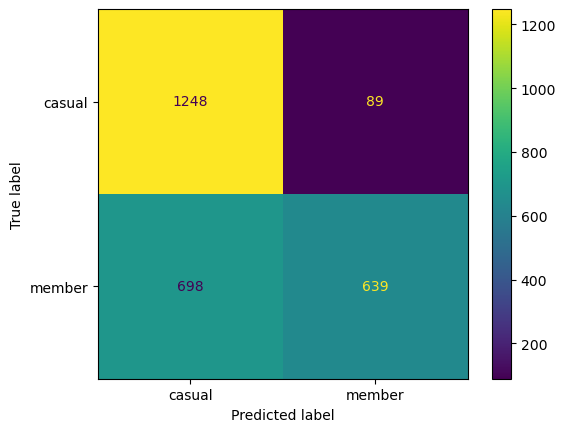

In [61]:
#prediction
y_pred = model_knn.predict(x_test)
df_score3 = GenerateOutput('KNN',x_test,y_test, y_pred, model_knn)
df_score3

#### 4.5.4.2) N-neighbors fine tuning

In [62]:
balanced_acc_list = []
for i in range( 1, 15 ):
    # model definition
    model_knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1 )
    # train model
    model_knn.fit( x_train, y_train )
    # prediction
    y_pred = model_knn.predict( x_test )
    # Balanced Accuracy Score
    balanced_acc_list.append( balanced_accuracy_score( y_test, y_pred))

Text(0, 0.5, 'Balanced Accuracy')

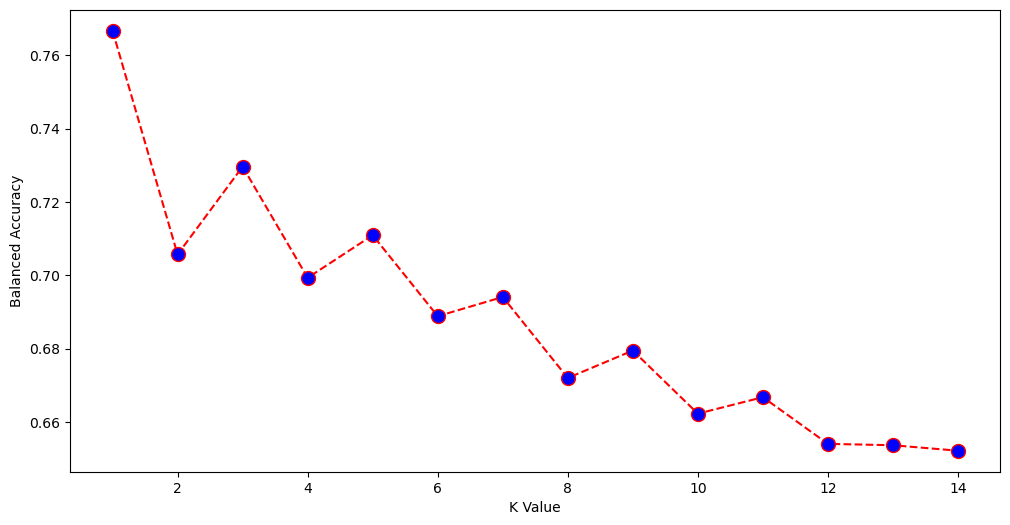

In [63]:
plt.figure( figsize=(12, 6) )
plt.plot( range( 1, 15 ), balanced_acc_list, color='red', linestyle='dashed', marker='o',
                                             markerfacecolor='blue', markersize=10 )
plt.xlabel('K Value' )
plt.ylabel('Balanced Accuracy')

From the above, it is clear that n_neighbors with value 1 provides the highest accuracy. 

              precision    recall  f1-score   support

      casual       0.73      0.85      0.78      1337
      member       0.82      0.69      0.75      1337

    accuracy                           0.77      2674
   macro avg       0.77      0.77      0.77      2674
weighted avg       0.77      0.77      0.77      2674



,Model Name,accuracy,f1_score,balanced_accuracy,roc_auc score
0,KNN,0.766642,0.765166,0.766642,0.766642


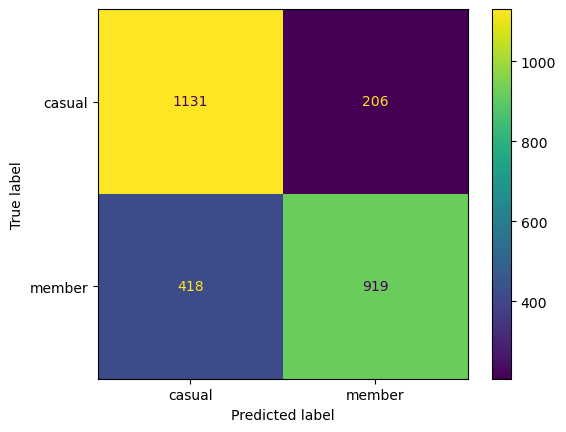

In [64]:
# model definition
model_knn = KNeighborsClassifier(n_neighbors=1, n_jobs=-1 )
# train model
model_knn.fit( x_train, y_train )
# prediction
y_pred = model_knn.predict( x_test )
#score calculation
df_score4 = GenerateOutput('KNN',x_test,y_test, y_pred, model_knn)
df_score4

## 4.5.5) Support Vector Machine(SVMs)

The main idea behind SVMs is to find the line (or hyperplane) that maximally separates the data points of different classes. This line is called the "maximum margin hyperplane." The points that lie closest to this line are called "support vectors." Once the support vectors are found, the algorithm uses them to construct the maximum margin hyperplane.<br />
However, SVMs can be sensitive to the choice of hyperparameters and can be computationally expensive to train, especially for large datasets. They also do not work well with noisy or highly imbalanced data, and they may not be suitable for tasks that require probability estimates.

In [65]:
# model definition
model_svm = svm.SVC(random_state=r_seed,probability=True)
# model training
model_svm.fit( x_train, y_train )

SVC(probability=True, random_state=42)

### 4.5.5.1) Performance

              precision    recall  f1-score   support

      casual       0.56      0.66      0.61      1337
      member       0.59      0.49      0.53      1337

    accuracy                           0.57      2674
   macro avg       0.58      0.57      0.57      2674
weighted avg       0.58      0.57      0.57      2674



,Model Name,accuracy,f1_score,balanced_accuracy,roc_auc score
0,SVM,0.573672,0.570495,0.573672,0.5


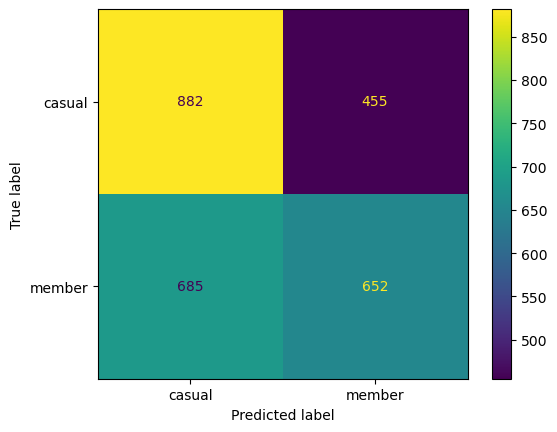

In [66]:
#prediction
y_pred = model_svm.predict(x_test)
df_score5 = GenerateOutput('SVM',x_test,y_test, y_pred,model_svm)
df_score5

## 4.5.6) SVM - Cross Validation

In [67]:
df_score6 = CrossVal_model("SVM", x_train, y_train)
df_score6

Avg Balanced Accuracy: 0.5331730769230769
Avg Weighted F1-Score: 0.4640055531101366
Avg AUC-ROC Score: 0.4692544347038729


,Model Name,accuracy,f1_score,balanced_accuracy,roc_auc score
0,SVM - Cross Validation,0.533013,0.533173,0.464006,0.469254


## 4.5.7) Decision Tree Classifier

Decision trees are simple, interpretable models that can be used for a wide range of classification tasks. They work by recursively splitting the data based on the feature values, and they can handle both continuous and categorical features. However, they can be prone to overfitting, especially when the tree becomes too deep, and they may not be as accurate as some other types of classifiers.

In [68]:
# model definition
model_clf = DecisionTreeClassifier()
# model training
model_clf.fit( x_train, y_train )

DecisionTreeClassifier()

### 4.5.7.1) Performance

              precision    recall  f1-score   support

      casual       0.78      0.77      0.78      1337
      member       0.77      0.79      0.78      1337

    accuracy                           0.78      2674
   macro avg       0.78      0.78      0.78      2674
weighted avg       0.78      0.78      0.78      2674



,Model Name,accuracy,f1_score,balanced_accuracy,roc_auc score
0,Decision Tree,0.777113,0.777098,0.777113,0.781975


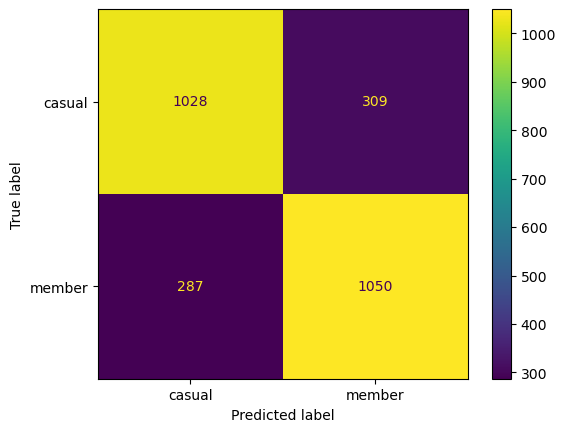

In [69]:
#prediction
y_pred = model_clf.predict(x_test)
df_score7 = GenerateOutput('Decision Tree',x_test,y_test, y_pred,model_clf)
df_score7

## 4.5.8) DecisionTreeClassifier - Cross Validation

In [70]:
df_score8 = CrossVal_model("DecisionTree", x_train, y_train)
df_score8

Avg Balanced Accuracy: 0.7465453553936701
Avg Weighted F1-Score: 0.7464674612751577
Avg AUC-ROC Score: 0.7465453553936701


,Model Name,accuracy,f1_score,balanced_accuracy,roc_auc score
0,DecisionTree - Cross Validation,0.74655,0.746545,0.746467,0.746545


## 4.5.9) Random Forest Classifier 

Random forests are an ensemble learning method for classification tasks. They work by training multiple decision trees on random subsets of the data and then averaging the predictions of all the trees to make a final prediction.



In [71]:
# Create a random forest classifier
mode_clf = RandomForestClassifier(random_state=r_seed)
#Train the classifer on the training data
model_clf.fit(x_train, y_train)

DecisionTreeClassifier()

### 4.5.9.1) Performance

              precision    recall  f1-score   support

      casual       0.77      0.77      0.77      1337
      member       0.77      0.77      0.77      1337

    accuracy                           0.77      2674
   macro avg       0.77      0.77      0.77      2674
weighted avg       0.77      0.77      0.77      2674



,Model Name,accuracy,f1_score,balanced_accuracy,roc_auc score
0,RandomForest,0.772625,0.772625,0.772625,0.776365


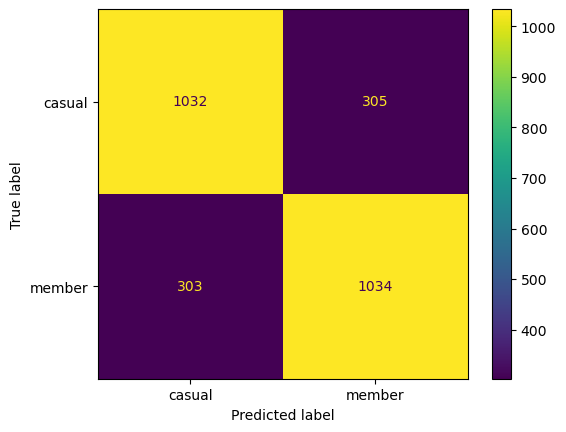

In [72]:
y_pred = model_clf.predict(x_test)
df_score9 = GenerateOutput('RandomForest',x_test,y_test, y_pred, model_clf)
df_score9

## 4.5.10) RandomForestClassifier - Cross Validation

In [73]:
df_score10 = CrossVal_model("RandomForestClassifier", x_train, y_train)
df_score10

Avg Balanced Accuracy: 0.8368054698110878
Avg Weighted F1-Score: 0.8365839778835431
Avg AUC-ROC Score: 0.9054017613100911


,Model Name,accuracy,f1_score,balanced_accuracy,roc_auc score
0,RandomForestClassifier - Cross Validation,0.836806,0.836805,0.836584,0.905402


# Hyperparameter tuning

GridSearchCV and RandomSearchCV are classes in the sklearn.model_selection module that can be used to perform hyperparameter optimization.<br />

GridSearchCV performs an exhaustive search over a specified parameter grid, while RandomSearchCV samples a set of random combinations of the hyperparameters. Both methods use cross-validation to evaluate the performance of the model with different hyperparameter combinations.

## 4.5.11) Logistic Regression - GridSearchCV 

In [74]:
# Define the logistic regression model
logreg = LogisticRegression()

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(x_train, y_train)

#prediction
y_pred = grid_search.predict(x_test)

#Print the best params 
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(best_params)
print(best_score)

# Use the best hyperparameters to fit the final model
logreg_best = LogisticRegression(**best_params)
logreg_best.fit(X_train, y_train)

# Make predictions on the test set
predictions = logreg_best.predict(X_test)


{'C': 100, 'penalty': 'l2'}
0.5732578701704604


## 4.5.11.1) Performance

              precision    recall  f1-score   support

      casual       0.61      0.61      0.61      1337
      member       0.61      0.60      0.61      1337

    accuracy                           0.61      2674
   macro avg       0.61      0.61      0.61      2674
weighted avg       0.61      0.61      0.61      2674



,Model Name,accuracy,f1_score,balanced_accuracy,roc_auc score
0,LogisticRegression-GridSearchCV,0.607704,0.607688,0.607704,0.612317


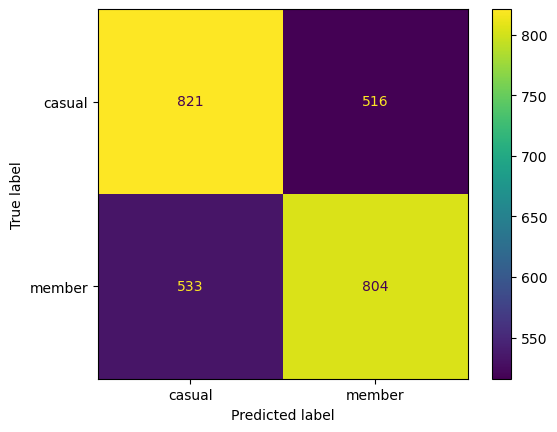

In [75]:
#performance 
df_score11 = GenerateOutput('LogisticRegression-GridSearchCV',x_test,y_test, predictions, logreg_best)
df_score11

## 4.5.12) KNN - RandomSearchCV

The param_dist dictionary specifies the hyperparameters to search over and the possible values for each. The n_iter parameter specifies the number of random combinations to try. The cv parameter specifies the number of folds to use in cross-validatio

In [76]:
# Set up the parameter distribution for the KNN hyperparameters
param_dist = {'n_neighbors': [1, 3, 5, 7, 9],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Initialize the randomized search
random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_dist, cv=5, n_iter=10)

# Fit the randomized search to the data
random_search.fit(x_train, y_train)

# Print the best hyperparameters
print(random_search.best_params_)

# Print the best cross-validation score
print(random_search.best_score_)


{'weights': 'distance', 'n_neighbors': 1, 'metric': 'manhattan'}
0.7428683969732486


### 4.5.12.1) Performance

In [77]:
# Predict on the test set
y_pred = random_search.predict(x_test)

              precision    recall  f1-score   support

      casual       0.73      0.85      0.78      1337
      member       0.82      0.68      0.74      1337

    accuracy                           0.76      2674
   macro avg       0.77      0.76      0.76      2674
weighted avg       0.77      0.76      0.76      2674



,Model Name,accuracy,f1_score,balanced_accuracy,roc_auc score
0,KNN-RandomSearchCV,0.763276,0.761648,0.763276,0.763276


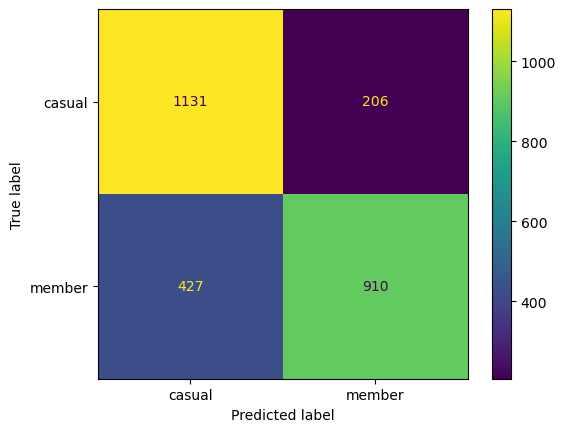

In [78]:
#performance 
df_score12 = GenerateOutput('KNN-RandomSearchCV',x_test,y_test, y_pred, random_search)
df_score12

## 4.5.13) SVM with GridSearchCV

In [79]:
# Set up the parameter grid for the SVM hyperparameters
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf', 'linear']}

# Initialize the SVM model
svm_svc = svm.SVC(random_state=r_seed, probability=True)

# Initialize the grid search
grid_search = GridSearchCV(estimator=svm_svc, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

# Print the best cross-validation score
print(grid_search.best_score_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.6821114263977135


### 4.5.13.1) Performance

In [80]:
# Predict on the test set
y_pred = grid_search.predict(x_test)

              precision    recall  f1-score   support

      casual       0.67      0.75      0.71      1337
      member       0.72      0.64      0.68      1337

    accuracy                           0.70      2674
   macro avg       0.70      0.70      0.69      2674
weighted avg       0.70      0.70      0.69      2674



,Model Name,accuracy,f1_score,balanced_accuracy,roc_auc score
0,SVM-GridSearchCV,0.695213,0.694186,0.695213,0.753992


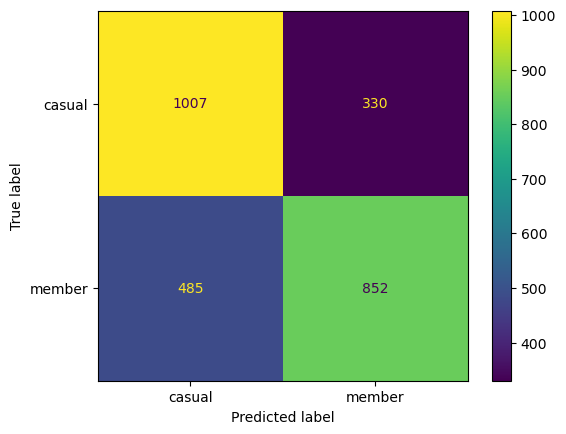

In [81]:
#performance 
df_score13 = GenerateOutput('SVM-GridSearchCV',x_test,y_test, y_pred,grid_search)
df_score13

## 4.5.14) DecisionTrees - RandomizedSearchCV

In [82]:

# Set up the parameter distribution for the decision tree hyperparameters
param_dist = {'max_depth': [1,3,5,7,9],
              'min_samples_split': [2,4,6,8,10,12,14,16],
              'min_samples_leaf': [1,3,5,7,9,13,15,17]}

# Initialize the decision tree model
tree = DecisionTreeClassifier()

# Initialize the randomized search
random_search = RandomizedSearchCV(estimator=tree, param_distributions=param_dist, cv=5, n_iter=10)

# Fit the randomized search to the data
random_search.fit(x_train, y_train)

# Print the best hyperparameters
print(random_search.best_params_)

# Print the best cross-validation score
print(random_search.best_score_)


{'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 9}
0.6989377069068328


### 4.5.14.1) Performance

In [83]:
# Predict on the test set
y_pred = random_search.predict(x_test)

              precision    recall  f1-score   support

      casual       0.67      0.76      0.71      1337
      member       0.72      0.62      0.67      1337

    accuracy                           0.69      2674
   macro avg       0.69      0.69      0.69      2674
weighted avg       0.69      0.69      0.69      2674



,Model Name,accuracy,f1_score,balanced_accuracy,roc_auc score
0,DecisonTree-RandomSearchCV,0.689978,0.688354,0.689978,0.748452


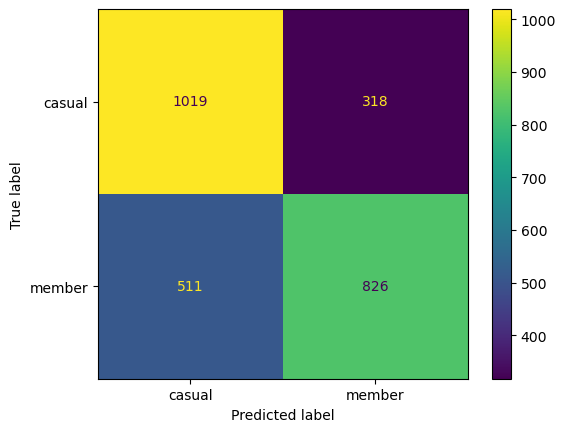

In [84]:
#performance 
df_score14 = GenerateOutput('DecisonTree-RandomSearchCV',x_test,y_test, y_pred,random_search)
df_score14

### 4.5.15) RandomForestClassifier - GridSearchCV

In [85]:
# Set up the parameter grid for the random forest hyperparameters
param_grid = {'n_estimators': [10, 50, 100],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Initialize the random forest model
forest = RandomForestClassifier()

# Initialize the grid search
grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

# Print the best cross-validation score
print(grid_search.best_score_)


{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.8387298747763865


### 4.5.15.1) Performance

In [86]:
# Predict on the test set
y_pred = grid_search.predict(x_test)

              precision    recall  f1-score   support

      casual       0.87      0.81      0.84      1337
      member       0.82      0.88      0.85      1337

    accuracy                           0.84      2674
   macro avg       0.85      0.84      0.84      2674
weighted avg       0.85      0.84      0.84      2674



,Model Name,accuracy,f1_score,balanced_accuracy,roc_auc score
0,RandomForestClassifier-GridSearchCV,0.84368,0.84351,0.84368,0.915868


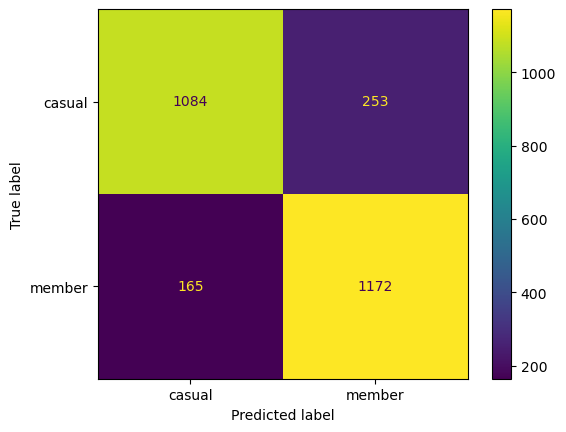

In [87]:
#performance 
df_score15 = GenerateOutput('RandomForestClassifier-GridSearchCV',x_test,y_test, y_pred, grid_search)
df_score15

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

## 5.1 Metric Evaluation 

### 5.1.1 Identification of Evaluation Metric

The following are evaulation metrics used for this particular binary classification. 

**Accuracy**: This is the percentage of correct predictions made by the classifier. It is calculated as (true positives + true negatives) / total samples.

**Precision**: This is the percentage of positive predictions that were correct. It is calculated as true positives / (true positives + false positives).

**F1 score**: This is a weighted average of precision and recall, with a higher score indicating better performance. It is calculated as 2 * (precision * recall) / (precision + recall).

**AUC (Area Under the Curve)**: This is a metric used to evaluate the performance of a binary classifier using an ROC (Receiver Operating Characteristic) curve. The ROC curve plots the true positive rate against the false positive rate at different classification thresholds, and the AUC is the area under this curve. AUC provides a single measure of the classifier's performance.

**Balanced accuracy**: This is a metric used to evaluate the performance of a classifier when the classes are imbalanced. It is defined as the average of the class-specific accuracies, where the class-specific accuracy for a class is the number of true positives for that class divided by the sum of the true positives and false negatives for that class.

In [88]:
modelling_result = pd.concat( [df_score, 
                               df_score2, 
                               df_score3, 
                               df_score4, 
                               df_score5, 
                               df_score6, 
                               df_score7, 
                               df_score8, 
                               df_score9, 
                               df_score10,
                               df_score11, 
                               df_score12, 
                               df_score13, 
                               df_score14, 
                               df_score15, 
                              ] )
modelling_result.sort_values( 'roc_auc score' )

,Model Name,accuracy,f1_score,balanced_accuracy,roc_auc score
0,SVM - Cross Validation,0.533013,0.533173,0.464006,0.469254
0,SVM,0.573672,0.570495,0.573672,0.500000
0,Logistic Regression - Cross Validation,0.570856,0.570855,0.570647,0.593515
0,Logistic Regression,0.574420,0.574392,0.574420,0.611239
0,LogisticRegression-GridSearchCV,0.607704,0.607688,0.607704,0.612317
0,DecisionTree - Cross Validation,0.746550,0.746545,0.746467,0.746545
0,DecisonTree-RandomSearchCV,0.689978,0.688354,0.689978,0.748452
0,SVM-GridSearchCV,0.695213,0.694186,0.695213,0.753992
0,KNN-RandomSearchCV,0.763276,0.761648,0.763276,0.763276
0,KNN,0.766642,0.765166,0.766642,0.766642


From the above results, we can clearly see that RandomForestClassifier with Hyperparameter tuning has greater ROC_AUC_Score and f1_score compared to the other models. 

### Best Model - Random Forest Classifier with GridSearchCV 

              precision    recall  f1-score   support

      casual       0.87      0.81      0.84      1337
      member       0.82      0.88      0.85      1337

    accuracy                           0.84      2674
   macro avg       0.85      0.84      0.84      2674
weighted avg       0.85      0.84      0.84      2674

***********************************
Train Time: 0.8244800567626953
Test Accuracy: 0.843679880329095
F1-Score: 0.8435103965932531
AUC-ROC Score: 0.9152656484868557
***********************************
*** Coefficients of Logistic Regression ***
start_lat coefficient: 0.1277256044496476
start_lng coefficient: 0.12939553661115719
end_lat coefficient: 0.13141374476272893
end_lng coefficient: 0.1226284912632746
distance coefficient: 0.08718391811020347
duration coefficient: 0.06472623206912465
rideable_type_classic_bike coefficient: 0.0693549673952476
rideable_type_docked_bike coefficient: 0.05598905624314184
rideable_type_electric_bike coefficient: 0.10731299540843567
h

4844    0
5648    1
1275    0
2995    0
867     1
       ..
8135    1
2453    0
6820    1
8444    1
2327    0
Name: member_casual, Length: 2674, dtype: int64

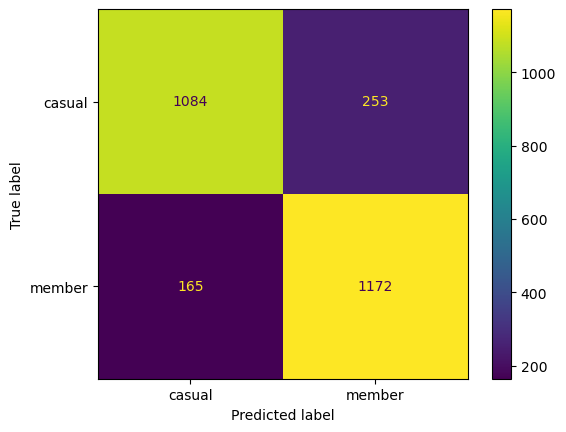

In [89]:
# Accuracy - Precision - Recall - F1 Score - Kappa Metrics - Confusion Matrix
print(classification_report( y_test, y_pred, digits=2) )
#confusion matrix display
lr_matrix = ConfusionMatrixDisplay.from_predictions(y_test,y_pred, display_labels=['casual', 'member'])

# =========== Balanced Dataframe Metrics =============
# Accuracy
lr_acc = accuracy_score( y_test, y_pred)
#print( 'Accuracy: {}'.format(lr_acc))


# =========== Unbalanced Dataframe Metrics =============
# Weighted F1-Score
f1score = f1_score( y_test, y_pred, average='weighted' )
#print( 'Weighted F1-Score: {}'.format( f1score ) )

# Balanced Accuracy Score
balanced_acc = balanced_accuracy_score( y_test, y_pred )
#print( 'Balanced Accuracy Score: {}'.format( balanced_acc))
    
model = RandomForestClassifier(random_state=r_seed)
start_time = time.time()
model.fit(x_train, y_train)
fit_time = time.time() - start_time


#Train Accuracy,
#train_acc = accuracy_score(y_train, y_pred)
#Accuracy 
acc = accuracy_score(y_test, y_pred)
# Balanced Accuracy
balanced_acc = balanced_accuracy_score( y_test, y_pred )
# Weighted F1-Score
weighted_f1_score = f1_score( y_test, y_pred, average='weighted')
#coef 

y_pred_proba = model.predict_proba(x_test)[:, 1]
# Calculate the AUC-ROC score
auc = roc_auc_score(y_test, y_pred_proba)
#print("AUC-ROC:", auc)
print('***********************************')
print( 'Train Time: {}'.format(fit_time))
#print( 'Train Accuracy: {}'.format(train_acc))
print( 'Test Accuracy: {}'.format(acc) )
print( 'F1-Score: {}'.format( weighted_f1_score ) )
print( 'AUC-ROC Score: {}'.format( auc ) )
columns = X_train.columns
print('***********************************')
print( '*** Coefficients of Logistic Regression ***')
for feature, coef_ in zip(columns, model.feature_importances_):
    print(f'{feature} coefficient: {coef_}')
print('***********************************')


#RocCurveDisplay.from_predictions(y_true=y_test, y_pred=y_pred_proba, name="Random Forest Classifier - GridSearchCV ROC Curve")

# 6) Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

The goal here is to make the prediction model accessible to anyone. To achieve this, an API is created.

The architecture of the model in production:

**AWS SageMaker** provides an HTTPS endpoint for your model, availing it to provide inferences in three steps:

1) Create the model in SageMaker, including the relevant S3 path and Docker registry path

2) Create an endpoint configuration for an HTTPS endpoint

3) Create an HTTPS endpoint

**API** -> is the part that receives the requests and plays for the other parts so that the data is processed and then brings everything together, returning the final answer.

**Data Preparation** -> all the treatments and modifications we made to the data will be kept inside. When the Handler receives the raw data it will throw it here within this list of treatment codes so that they are prepared so that they can be ready to be used within the Machine Learning model.

**Model Training** -> this is our trained model that has been saved and will be placed inside this folder in our production architecture. The Handler will take the data processed within Data Preparation and play it inside the model so that it provides the prediction.

At the end of the construction of all this architecture and being put into production, the way it will be visualized can be through an App, Dashboard or a website.




# 7) Findings

Citi Bike is a bike-sharing service in New York City that allows users to rent and ride bikes from a network of self-service docking stations located throughout the city.

1) Casual bike users travel greater distance than member bike users
2) Casual bikers ride more on a holiday and normal day. However, the total number of bikers are relatively smaller on a holiday.
3) Member bikers do ride more on the weekdays compared to weekends
4) Member riders have been consistent over a period of time with respect to casual users. Overall usage of bike riding members have incresae in the months starting June to November.
5) The busy hours are between 6am and 8:30pm.
6) The member bikers ride more during afternoon compared to morning.
7) Similar to member bikers, casual bikers ride more during afternoon compared to early morning.
8) Casual bike riders ride more during the summer season compared to other seasons
9) The docked bike is used more during wednesday, thursday and friday.
10) The classic bike and electric bikes are driven more compared to docked bike.
11) The average distance travelled by the bikers is less than one mile. 
12) The two stations that are most popular are Grove St Path and South Waterfron Walkway - Sintara Dr & 1st.

# 8) Next Steps

Further classification can be performed in a variety of ways. Some other common ways to classify bike rides in NYC include. 
1) Purpose: Bike rides in New York City can be classified based on the purpose of the ride, such as charity rides, group rides for fitness or socialization, or rides organized for a specific cause or event.

2) Type of terrain: Bike rides in New York City can also be classified based on the type of terrain they cover, such as road rides, off-road rides, or a combination of both.

3) Distance: Bike rides in New York City can be classified based on their distance, such as short rides around a specific neighborhood or borough, or longer rides that cover greater distances within the city or beyond.

4) Difficulty: Bike rides in New York City can be classified based on their level of difficulty, such as easy, moderate, or challenging rides.

5) Age or skill level: Bike rides in New York City can also be classified based on the age or skill level of the participants, such as rides specifically designed for children, beginners, or experienced riders.

6) Theme: Bike rides in New York City can be classified based on a specific theme or focus, such as food or drink-themed rides, cultural or historical rides, or rides that highlight a particular neighborhood or area of the city.

7) Size or fit: Bikes can be classified based on size or fit, such as children's bikes, small/medium/large frame sizes for adult bikes, etc.

8) Construction: Bikes can be classified based on their construction, such as hardtail (front suspension only) and full-suspension (front and rear suspension) mountain bikes, or steel, aluminum, or carbon fiber frame materials.
